# Intro

In [110]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, os, string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import arrow
from datetime import datetime

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
os.getcwd()

'c:\\Users\\abhis\\Documents\\git_repo\\feature-engineering'

In [112]:
# # access google drive
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/My Drive/UFO

In [113]:
# # change folder to UFO
# %cd /gdrive/MyDrive/UFO/

In [114]:
pwd()

'c:\\Users\\abhis\\Documents\\git_repo\\feature-engineering'

In [115]:
# read the csv datasets
df = pd.read_csv('C:/Users/abhis\Documents/feature-eng/data/UFO/ufo.csv')
#df = pd.read_csv('/Users/rahimjiwa/Documents/Github/feature-engineering/data/UFO/ufo.csv')

In [116]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text_ID            88124 non-null  int64  
 1   summary            88094 non-null  object 
 2   city               87890 non-null  object 
 3   state              82889 non-null  object 
 4   date_time          86938 non-null  object 
 5   shape              85626 non-null  object 
 6   stats              88087 non-null  object 
 7   report_link        88124 non-null  object 
 8   text               88069 non-null  object 
 9   posted             86938 non-null  object 
 10  city_latitude      72012 non-null  float64
 11  city_longitude     72012 non-null  float64
 12  Duration Category  88124 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 8.7+ MB


In [117]:
# check the number of unique instances
df.nunique()

Text_ID              88124
summary              86949
city                 16915
state                   65
date_time            73122
shape                   21
stats                88071
report_link          88124
text                 87419
posted                 387
city_latitude        11208
city_longitude       11388
Duration Category        5
dtype: int64

In [118]:
# it doesn't look like Text_ID will be useful, let's start by dropping that
#df.drop(columns='Text_ID', inplace=True)

In [119]:
# now let's check for and drop any duplicates
df.duplicated().value_counts()
# so according to this, there are no duplicates, maybe this is something we should check once all the preprocessing is done

False    88124
dtype: int64

In [120]:
# it is important to note, that the web links could be different for them
df['report_link'].nunique()

88124

In [121]:
# we are just renaming this for simplicity
df.rename(columns={"Duration Category":"Duration"}, inplace=True)

In [122]:
# this suggests that all web links are unique, this however gives you an issue of having duplicates
# that are simply different links, for this, we will drop the duplicates ignoring this column
# can we drop this column and then drop the duplicates?
# if we don't use or plan to scrape the data then we should be able to
#df.drop(columns="report_link", inplace=True)
df.drop_duplicates(subset=['summary','city','state','date_time','shape',
                           'stats','text','posted','city_latitude','city_longitude','Duration'],inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88122 entries, 0 to 88123
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Text_ID         88122 non-null  int64  
 1   summary         88092 non-null  object 
 2   city            87888 non-null  object 
 3   state           82888 non-null  object 
 4   date_time       86936 non-null  object 
 5   shape           85624 non-null  object 
 6   stats           88085 non-null  object 
 7   report_link     88122 non-null  object 
 8   text            88067 non-null  object 
 9   posted          86936 non-null  object 
 10  city_latitude   72011 non-null  float64
 11  city_longitude  72011 non-null  float64
 12  Duration        88122 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 9.4+ MB


In [124]:
# how many columns have NaN
is_nan = df.isnull()
row_has_nan  = is_nan.any(axis=1)
rows_with_nan = df[row_has_nan]
# get info
rows_with_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 2 to 88123
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Text_ID         18835 non-null  int64  
 1   summary         18805 non-null  object 
 2   city            18601 non-null  object 
 3   state           13601 non-null  object 
 4   date_time       17649 non-null  object 
 5   shape           16337 non-null  object 
 6   stats           18798 non-null  object 
 7   report_link     18835 non-null  object 
 8   text            18780 non-null  object 
 9   posted          17649 non-null  object 
 10  city_latitude   2724 non-null   float64
 11  city_longitude  2724 non-null   float64
 12  Duration        18835 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [125]:
# we can see here, that we are missing quite a bit of data and will have to work to preprocess and enrich the dataset


# Summary/Text

In [126]:
# let's start by taking a look at the summary and text columns
df['summary']

0        My wife was driving southeast on a fairly popu...
1        I think that I may caught a UFO on the NBC Nig...
2        I woke up late in the afternoon 3:30-4pm. I we...
3        I was driving towards the intersection of fall...
4        In Peoria Arizona, I saw a cigar shaped craft ...
                               ...                        
88119    4 lights in formation over Tempe appear while ...
88120    2 bright star like lights in the NNW skys,  ((...
88121    I just witnessed a ‘Phoenix Lights’ type of fo...
88122    Witnessed an orange, slow moving light. Was lo...
88123    Glowing lights in formation  just south of San...
Name: summary, Length: 88122, dtype: object

In [127]:
# now lets look at text
df['text']

0        My wife was driving southeast on a fairly popu...
1        I think that I may caught a UFO on the NBC Nig...
2        I woke up late in the afternoon 3:30-4pm.  I w...
3        I was driving towards the intersection of fall...
4        In Peoria, Arizona, I saw a cigar shaped craft...
                               ...                        
88119    4 lights in formation over Tempe appear while ...
88120    2 bright star like lights in the NNW sky two b...
88121    10/2/19 @ 8:03PM EST  UFO SIGHTING in the 3428...
88122    Witnessed an orange, slow moving light. Was lo...
88123    Glowing lights in formation  just south of San...
Name: text, Length: 88122, dtype: object

In [128]:
# taking a quick look, we can tell some preprocessing will need to be done
# things to look out for
# "(())", capitalization, punctuation
# looking at just the snippets, i would hypothesize that a large number of the summaries are simple substrings of the text
# furthermore it is likely that many do not add additional information
# before we go ahead and simple drop the data, let's take a closer look

# print out some instances
print(df['summary'][0])
print(df['text'][0])
print(df['summary'][4])
print(df['text'][4])
print(df['summary'][88120])
print(df['text'][88120])


My wife was driving southeast on a fairly populated main side road, it was dark out side at about 6:43pm, And my wife exclaimed” fallin
My wife was driving southeast on a fairly populated main side road, it was dark out side at about 6:43pm, And my wife exclaimed” falling star baby look quick!” When I looked up I saw not a falling star but a bright ball of light , one that was closer than any shooting star I have ever seen, it had a blue glow  changing into green colors of light as it fell from the sky. It fell as if falling from an invisible opening in the sky... the night was a crystal clear night sky  so no clouds or precipitation to obstruct our view and the object was closer than any I have ever witnessed before. The way the object fell was too slow to be a meteor or falling star, also noting that there was no “light trail” following behind the object as it fell. We watched it fall for about 5 seconds before it disappeared into the dark night sky somewhere close to the earth surfa

In [129]:
# let's start by writing a function to extract the data from the (()) and remove it from the text, these seem to be internal notes
def remove_notes(arg):
  arg = re.findall('\(\(.*?\)\)', str(arg))
  return arg

# and we will write a separate function to strip out the notes from the data after
def strip_notes(arg):
  arg = re.sub('\(\(.*?\)\)','',str(arg))
  return arg

In [130]:
# we can apply these to are data and to both the summary and the text columns
df['summary_notes'] = df.apply(lambda row: remove_notes(row['summary']), axis=1)
df['text_notes'] = df.apply(lambda row: remove_notes(row['text']), axis=1)
# now let's use strip notes to strip the notes from the strings
df['summary'] = df.apply(lambda row: strip_notes(row['summary']), axis=1)
df['text'] = df.apply(lambda row: strip_notes(row['text']), axis=1)

In [131]:
#let's take a look at our data now, we can look at row 88120 because we know it has a (())
df.iloc[88120,:]

Text_ID                                                       88123
summary           Witnessed an orange, slow moving light. Was lo...
city                                                 Black Mountain
state                                                            NC
date_time                                       2019-10-02T22:00:00
shape                                                      fireball
stats             Occurred : 10/2/2019 22:00  (Entered as : 10/0...
report_link       http://www.nuforc.org/webreports/149/S149447.html
text              Witnessed an orange, slow moving light. Was lo...
posted                                          2019-10-04T00:00:00
city_latitude                                                35.605
city_longitude                                             -82.3132
Duration                                                    minutes
summary_notes                                                    []
text_notes                                      

In [132]:
# we can see now, that our function extracted the note data, and remove the notes from the summary/text
# now we can do other preprocessing like removing punctuation, lowercasing
def basic_clean(arg):
  # make all lowercase
  arg = arg.lower()
  # remove punctuation
  arg = arg.translate(str.maketrans('','', string.punctuation))
  # correct spacing issues
  arg = " ".join(arg.split())
  return arg

In [133]:
# let's use this on our textual data
df['summary'] = df.apply(lambda row: basic_clean(row['summary']), axis=1)
df['text'] = df.apply(lambda row: basic_clean(row['text']), axis=1)

In [134]:
# lets look at our data now
df.head(3)

,Text_ID,summary,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,city_longitude,Duration,summary_notes,text_notes
0,1,my wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,my wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582,seconds,[],[]
1,2,i think that i may caught a ufo on the nbc nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,i think that i may caught a ufo on the nbc nig...,2019-03-29T00:00:00,41.664800,-72.639300,seconds,[],[]
2,3,i woke up late in the afternoon 3304pm i went ...,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,i woke up late in the afternoon 3304pm i went ...,NaN,NaN,NaN,Unknown,[],[]


In [135]:
df.iloc[88120,:]

Text_ID                                                       88123
summary           witnessed an orange slow moving light was look...
city                                                 Black Mountain
state                                                            NC
date_time                                       2019-10-02T22:00:00
shape                                                      fireball
stats             Occurred : 10/2/2019 22:00  (Entered as : 10/0...
report_link       http://www.nuforc.org/webreports/149/S149447.html
text              witnessed an orange slow moving light was look...
posted                                          2019-10-04T00:00:00
city_latitude                                                35.605
city_longitude                                             -82.3132
Duration                                                    minutes
summary_notes                                                    []
text_notes                                      

In [136]:
# okay, now we still have some minor issues here
# let's look to see how many instances we have that are not clips
# here we will look for if the str summary is in str text
df['summary_in_text'] = df.apply(lambda row: row['summary'] in row['text'], axis=1)
df['summary_in_text'].value_counts()

True     81184
False     6938
Name: summary_in_text, dtype: int64

In [137]:
# let's look at the instances that are False
df.loc[df['summary_in_text'] == False,['summary','text']]

,summary,text
11,2 tiny lights recorded for about a minute we w...,we think 2 ufos2 tiny lights recorded for abou...
26,spotted it behind my property next to rt 476 n...,spotted it behind my property next to rt 476 n...
79,white ball about the size of a kick ballhovers...,white ball about the size of a kick ball hover...
129,name,working the night shiftand always watching the...
142,this sighting took place in 1990 over in the m...,this sighting took place in 1990 over in the m...
...,...,...
88038,before sunsetin the sky we saw a tear drop sha...,before sunsetin the sky we saw a tear drop sha...
88046,three flying objects colored orange yellow lig...,three flying objects colored orangeyellow ligh...
88056,several large green orbs rotating in coordinat...,several large green orbs rotating in coordinat...
88067,my remote started glowing again and continued ...,my remote started glowing again and continued ...


In [138]:
print(df['summary'][88038])
print(df['text'][88038])

before sunsetin the sky we saw a tear drop shaped shining bright white kind of resembling a huge hot air balloonnot moving at all
before sunsetin the sky we saw a tear drop shaped shining bright white kind of resembling a huge hot air balloon not moving at all an airplane flew next to it and its size dwarfed the size of the airplane several neighbors outside and people pulling over in their cars to look at it after sunset it is no longer visible


In [139]:
df['summary'].isnull().value_counts()

False    88122
Name: summary, dtype: int64

In [140]:
#it looks like a lot of the remaining instances have typos or have missing spaces, etc
# there are ways we could solve this
# we could just drop the summary figuring okay, we have only 7000/88000 that we haven't confirmed are essentially the same
# we could also use the levenshtein distance or some fuzzy string matching and set a threashold to see how many are totally off
# just looking at the dataframe, we can see that there is atleast one that is totally off base, most however seem to be minor error

In [141]:
# install package
# import module
from fuzzywuzzy import fuzz
# function that can be applied to df
def fuzzy_ratio(summary, text):
  ratio = fuzz.partial_ratio(summary, text)
  return ratio

In [142]:
# let's apply the ratio to our df
# we are going to overwrite the sum_in_text column
# this is because, if already indicating true, it will yield 100 score
df['summary_in_text'] = df.apply(lambda row: fuzzy_ratio(row['summary'], row['text']), axis=1)

In [143]:
df[df['summary_in_text'] > 90].count()

Text_ID            86136
summary            86136
city               85908
state              81041
date_time          84988
shape              83721
stats              86136
report_link        86136
text               86136
posted             84988
city_latitude      70451
city_longitude     70451
Duration           86136
summary_notes      86136
text_notes         86136
summary_in_text    86136
dtype: int64

In [144]:
# okay, if we use a 90% threshold, we've got 86716/88214 instances, thats good enough
# we can now drop the summary and the summary_in_text columns
df = df[df['summary_in_text'] > 90]
df.drop(columns=['summary','summary_in_text'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86136 entries, 0 to 88123
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Text_ID         86136 non-null  int64  
 1   city            85908 non-null  object 
 2   state           81041 non-null  object 
 3   date_time       84988 non-null  object 
 4   shape           83721 non-null  object 
 5   stats           86136 non-null  object 
 6   report_link     86136 non-null  object 
 7   text            86136 non-null  object 
 8   posted          84988 non-null  object 
 9   city_latitude   70451 non-null  float64
 10  city_longitude  70451 non-null  float64
 11  Duration        86136 non-null  object 
 12  summary_notes   86136 non-null  object 
 13  text_notes      86136 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.9+ MB


In [145]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def lemmatize_removestop(str):
  word_list = word_tokenize(str)
  output = []
  for i in word_list:
    if i not in stop_words:
      output.append(lemmatizer.lemmatize(i))
  output = " ".join(output)
  return output

In [146]:
df['text'] = df.apply(lambda row: lemmatize_removestop(row['text']),axis=1)

In [147]:
df['text'][0:10]

0    wife driving southeast fairly populated main s...
1    think may caught ufo nbc nightly news aired ma...
2    woke late afternoon 3304pm went bath shaving l...
3    driving towards intersection fallowfield eagle...
4    peoria arizona saw cigar shaped craft floating...
5    object flashing light green blue red white lig...
6    description washington dc event 50 ’ glitter t...
7    apr 10th witnessed bright silvery round object...
8    ufo report irving texas 2200 hr july 1973 1974...
9    group light formation sweeping thru night sky ...
Name: text, dtype: object

# Stats

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86136 entries, 0 to 88123
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Text_ID         86136 non-null  int64  
 1   city            85908 non-null  object 
 2   state           81041 non-null  object 
 3   date_time       84988 non-null  object 
 4   shape           83721 non-null  object 
 5   stats           86136 non-null  object 
 6   report_link     86136 non-null  object 
 7   text            86136 non-null  object 
 8   posted          84988 non-null  object 
 9   city_latitude   70451 non-null  float64
 10  city_longitude  70451 non-null  float64
 11  Duration        86136 non-null  object 
 12  summary_notes   86136 non-null  object 
 13  text_notes      86136 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.9+ MB


In [149]:
df['stats_duplicated'] = df['stats'].duplicated(keep=False)

In [150]:
df['stats_duplicated'].value_counts()

False    86112
True        24
Name: stats_duplicated, dtype: int64

In [151]:
def separate_stats(arg):
  if isinstance(arg, float):
    return arg
  else:
    #arg = arg.split(" ", )
    #print(arg)
    arg = str(arg).replace("Duration:", "Duration: ")
    arg = arg.split(" ", )
    #print(arg)
    #print(arg)
    merge_rules = [(arg.index("Occurred"),arg.index("Reported:")),(arg.index("Reported:"),arg.index("Posted:")),(arg.index("Posted:"),arg.index("Location:")),
                 (arg.index("Location:"),arg.index("Shape:")),(arg.index("Shape:"),arg.index("Duration:")),(arg.index("Duration:"),len(arg))]
    result = []
    index = 0
    for start, end in merge_rules:
      result += arg[index:start]
      result.append(" ".join(arg[start:end]))
      index = end
    return result

In [152]:
df['stats'] = df.apply(lambda row: separate_stats(row['stats']), axis=1)
df.head(2)

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,city_longitude,Duration,summary_notes,text_notes,stats_duplicated
0,1,Chester,VA,2019-12-12T18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,-77.408582,seconds,[],[],False
1,2,Rocky Hill,CT,2019-03-22T18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,-72.639300,seconds,[],[],False


In [153]:
df[df['stats_duplicated'] == True].head(2)

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,city_longitude,Duration,summary_notes,text_notes,stats_duplicated
15,16,Gray Court,SC,1975-07-17T00:00:00,light,[Occurred : 7/17/1975 00:00 (Entered as : 07/...,http://www.nuforc.org/webreports/147/S147117.html,strange bright light hovered mobile home nufor...,2019-07-05T00:00:00,34.578800,-82.114100,minutes,[],[],True
1409,1410,Carlsbad,NM,2006-05-11T20:30:00,light,[Occurred : 5/11/2006 20:30 (Entered as : 05/...,http://www.nuforc.org/webreports/050/S50526.html,strange light moving moon approx 830 pm evenin...,2006-05-15T00:00:00,32.301554,-104.286505,minutes,[((NUFORC Note: International Space Station s...,[((NUFORC Note: International Space Station s...,True


In [154]:
df[df['stats'].isnull() == True]

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,city_longitude,Duration,summary_notes,text_notes,stats_duplicated


In [155]:
df['stats'][87600]

['Occurred : 12/12/2019 12:32  (Entered as : 12/12/19 12:32)',
 'Reported: 12/12/2019 10:45:11 PM 22:45',
 'Posted: 12/19/2019',
 'Location: Albany, OR',
 'Shape: ',
 'Duration: 1-2 seconds']

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86136 entries, 0 to 88123
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Text_ID           86136 non-null  int64  
 1   city              85908 non-null  object 
 2   state             81041 non-null  object 
 3   date_time         84988 non-null  object 
 4   shape             83721 non-null  object 
 5   stats             86136 non-null  object 
 6   report_link       86136 non-null  object 
 7   text              86136 non-null  object 
 8   posted            84988 non-null  object 
 9   city_latitude     70451 non-null  float64
 10  city_longitude    70451 non-null  float64
 11  Duration          86136 non-null  object 
 12  summary_notes     86136 non-null  object 
 13  text_notes        86136 non-null  object 
 14  stats_duplicated  86136 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(11)
memory usage: 12.0+ MB


In [157]:
df.dropna(subset=['stats'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86136 entries, 0 to 88123
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Text_ID           86136 non-null  int64  
 1   city              85908 non-null  object 
 2   state             81041 non-null  object 
 3   date_time         84988 non-null  object 
 4   shape             83721 non-null  object 
 5   stats             86136 non-null  object 
 6   report_link       86136 non-null  object 
 7   text              86136 non-null  object 
 8   posted            84988 non-null  object 
 9   city_latitude     70451 non-null  float64
 10  city_longitude    70451 non-null  float64
 11  Duration          86136 non-null  object 
 12  summary_notes     86136 non-null  object 
 13  text_notes        86136 non-null  object 
 14  stats_duplicated  86136 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(11)
memory usage: 9.9+ MB


In [158]:
split_df = pd.DataFrame(df['stats'].to_list(), columns = ['Occurred_stats', 'Reported_stats', 'Posted_stats','Location_stats','Shape_stats','Duration_stats'])

In [159]:
split_df['Occurred_stats']

0        Occurred : 12/12/2019 18:43  (Entered as : 12/...
1        Occurred : 3/22/2019 18:30  (Entered as : 03/2...
2        Occurred : 4/1/2019 15:45  (Entered as : April...
3        Occurred : 4/17/2019 02:00  (Entered as : 04-1...
4        Occurred : 3/15/2009 18:00  (Entered as : 03/1...
                               ...                        
86131    Occurred : 10/2/2019 20:00  (Entered as : 10/2...
86132    Occurred : 10/2/2019 20:00  (Entered as : 10/0...
86133    Occurred : 10/2/2019 20:03  (Entered as : 10/0...
86134    Occurred : 10/2/2019 22:00  (Entered as : 10/0...
86135    Occurred : 10/2/2019 22:00  (Entered as : 10-0...
Name: Occurred_stats, Length: 86136, dtype: object

In [160]:
split_df['Reported_stats']

0        Reported: 12/19/2019 7:19:31 PM 19:19
1         Reported: 3/27/2019 4:10:19 PM 16:10
2          Reported: 4/8/2019 9:42:31 PM 21:42
3         Reported: 4/17/2019 8:41:25 AM 08:41
4         Reported: 4/17/2019 6:30:52 PM 18:30
                         ...                  
86131    Reported: 10/3/2019 10:09:11 PM 22:09
86132     Reported: 10/2/2019 7:35:17 AM 07:35
86133     Reported: 10/2/2019 5:31:18 PM 17:31
86134     Reported: 10/3/2019 7:00:19 AM 07:00
86135     Reported: 10/3/2019 1:40:38 PM 13:40
Name: Reported_stats, Length: 86136, dtype: object

In [161]:
df = pd.concat([df, split_df['Reported_stats']], axis=1)
df = pd.concat([df, split_df['Occurred_stats']], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88084 entries, 0 to 88123
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Text_ID           86136 non-null  float64
 1   city              85908 non-null  object 
 2   state             81041 non-null  object 
 3   date_time         84988 non-null  object 
 4   shape             83721 non-null  object 
 5   stats             86136 non-null  object 
 6   report_link       86136 non-null  object 
 7   text              86136 non-null  object 
 8   posted            84988 non-null  object 
 9   city_latitude     70451 non-null  float64
 10  city_longitude    70451 non-null  float64
 11  Duration          86136 non-null  object 
 12  summary_notes     86136 non-null  object 
 13  text_notes        86136 non-null  object 
 14  stats_duplicated  86136 non-null  object 
 15  Reported_stats    86136 non-null  object 
 16  Occurred_stats    86136 non-null  object

In [162]:
df['posted'].isnull().value_counts()

False    84988
True      3096
Name: posted, dtype: int64

In [182]:
def clean_reported_stats(arg):
    arg = str(arg).replace("Reported: ","")
    arg = arg.split()
    if len(arg) == 4:
        del arg[-1]
        arg = " ".join(arg)
        arg = datetime.strptime(arg, '%m/%d/%Y %I:%M:%S %p')
        return arg
    else:
        arg = " ".join(arg)
        return arg

def clean_occurred_stats(arg):
    arg = str(arg).replace("Occurred: ","")
    arg = arg.split()
    if len(arg) > 1:
        try:
           
            arg = " ".join(arg[2:4])
            arg = datetime.strptime(arg, '%m/%d/%Y %H:%M')
            return arg
        except:
            return arg    
    else:
        arg = " ".join(arg)
        return arg

In [172]:
test_df = df.copy(deep=True)
test = test_df['Occurred_stats'][0]

In [180]:
test_df['Occurred_stats_new'] = test_df.apply(lambda row: clean_occurred_stats(row['Occurred_stats']), axis=1)

In [181]:
test_df['Occurred_stats_new']

0        2019-12-12 18:43:00
1        2019-03-22 18:30:00
2        2019-04-01 15:45:00
3        2019-04-17 02:00:00
4        2009-03-15 18:00:00
                ...         
88119                    nan
88120                    nan
88121                    nan
88122                    nan
88123                    nan
Name: Occurred_stats_new, Length: 88084, dtype: object

In [183]:
df['Reported_stats'] = df.apply(lambda row: clean_reported_stats(row['Reported_stats']), axis=1)
df['Occurred_stats'] = df.apply(lambda row: clean_occurred_stats(row['Occurred_stats']), axis=1)

In [187]:
df['Occurred_stats']

0        2019-12-12 18:43:00
1        2019-03-22 18:30:00
2        2019-04-01 15:45:00
3        2019-04-17 02:00:00
4        2009-03-15 18:00:00
                ...         
88119                    nan
88120                    nan
88121                    nan
88122                    nan
88123                    nan
Name: Occurred_stats, Length: 88084, dtype: object

In [185]:
type(df['Occurred_stats'][2])

datetime.datetime

In [188]:
df.columns

Index(['Text_ID', 'city', 'state', 'date_time', 'shape', 'stats',
       'report_link', 'text', 'posted', 'city_latitude', 'city_longitude',
       'Duration', 'summary_notes', 'text_notes', 'stats_duplicated',
       'Reported_stats', 'Occurred_stats'],
      dtype='object')

In [192]:
df[df['date_time'].isnull()].head(3)

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,city_longitude,Duration,summary_notes,text_notes,stats_duplicated,Reported_stats,Occurred_stats
2,3.0,NaN,NaN,NaN,NaN,[Occurred : 4/1/2019 15:45 (Entered as : Apri...,http://www.nuforc.org/webreports/145/S145556.html,woke late afternoon 3304pm went bath shaving l...,NaN,NaN,NaN,Unknown,[],[],False,2019-04-08 21:42:31,2019-04-01 15:45:00
32,33.0,New York,NY,NaN,cylinder,[Occurred : 8/20/1965 20:30 (Entered as : 08/...,http://www.nuforc.org/webreports/049/S49816.html,1965 dark grey cylinder ufo updated statement ...,NaN,40.744307,-73.987724,minutes,[],[],False,2006-03-25 18:33:21,1965-08-20 20:30:00
33,34.0,Bristol,PA,NaN,light,"[Occurred : (Entered as : unknown), Reporte...",http://www.nuforc.org/webreports/049/S49760.html,hi avid sky watcher usually notice little ball...,NaN,40.117200,-74.849500,minutes,[],[((NUFORC Note: Witness does not indicate dat...,False,2006-03-21 12:11:10,(Entered as


In [195]:
test_df = df.copy(deep=True)

In [199]:
idx_null = test_df[test_df['date_time'].isnull()].index

In [201]:
idx_null = idx_null.tolist()

In [204]:
# Function to traverse a list and populate the null instances
def fill_dates(df,column_to,column_from):
    idx_null = df[df[column_to].isnull()].index
    idx_null = idx_null.tolist()
    for x in idx_null:
        df[column_to][x] = df[column_from][x]

    return df    

In [207]:
test_df_new = fill_dates(test_df,'date_time','Occurred_stats')

In [208]:
idx_null[0]

2

In [209]:
test_df_new['date_time'][2]

datetime.datetime(2019, 4, 1, 15, 45)

In [211]:
len(df)

88084

In [212]:
df = fill_dates(df,'date_time','Occurred_stats')

C:\Users\abhis\AppData\Local\Temp/ipykernel_16504/3972174133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_to][x] = df[column_from][x]


In [215]:
#now lets drop the rows that are not dates
df['date_time'][33]

'(Entered as'

In [222]:
len(df)

88084

In [216]:
test_df = df.copy(deep=True)

In [217]:
test_df['date_time'] = pd.to_datetime(test_df['date_time'], errors='coerce')
test_df = test_df.dropna(subset=['date_time'])

In [225]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df = df.dropna(subset=['date_time'])

In [227]:
df['year'] = (df.date_time.dt.year).astype('Int64')
df['hour'] = (df.date_time.dt.hour).astype('Int64')
time_of_day_intervals = [0,4,8,12,16,20,24] ##we could decide on the bin size here
time_of_day = ['LATE NIGHT', 'EARLY MORNING','MORNING','AFTERNOON','EVENING','NIGHT']
df['time_of_day'] = pd.cut(df['hour'], bins=time_of_day_intervals, labels=time_of_day, include_lowest=True)

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,city_longitude,Duration,summary_notes,text_notes,stats_duplicated,Reported_stats,Occurred_stats,year,hour,time_of_day
0,1.0,Chester,VA,2019-12-12 18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,-77.408582,seconds,[],[],False,2019-12-19 19:19:31,2019-12-12 18:43:00,2019,18,EVENING
1,2.0,Rocky Hill,CT,2019-03-22 18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,-72.639300,seconds,[],[],False,2019-03-27 16:10:19,2019-03-22 18:30:00,2019,18,EVENING
2,3.0,NaN,NaN,2019-04-01 15:45:00,NaN,[Occurred : 4/1/2019 15:45 (Entered as : Apri...,http://www.nuforc.org/webreports/145/S145556.html,woke late afternoon 3304pm went bath shaving l...,NaN,NaN,NaN,Unknown,[],[],False,2019-04-08 21:42:31,2019-04-01 15:45:00,2019,15,AFTERNOON


# Geographic

In [229]:
# let's take a look at this data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88024 entries, 0 to 88123
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text_ID           86102 non-null  float64       
 1   city              85874 non-null  object        
 2   state             81012 non-null  object        
 3   date_time         88024 non-null  datetime64[ns]
 4   shape             83689 non-null  object        
 5   stats             86102 non-null  object        
 6   report_link       86102 non-null  object        
 7   text              86102 non-null  object        
 8   posted            84988 non-null  object        
 9   city_latitude     70426 non-null  float64       
 10  city_longitude    70426 non-null  float64       
 11  Duration          86102 non-null  object        
 12  summary_notes     86102 non-null  object        
 13  text_notes        86102 non-null  object        
 14  stats_duplicated  8610

In [230]:
# we have a couple of geographic info columns: city, state, long and lat
# some of this is redundant information
# what we have to determine first, is what data is missing and to fill it in
print(df['city'].isnull().value_counts())
print(df['state'].isnull().value_counts())

False    85874
True      2150
Name: city, dtype: int64
False    81012
True      7012
Name: state, dtype: int64


In [231]:
print(df['city_latitude'].isnull().value_counts())
print(df['city_longitude'].isnull().value_counts())

False    70426
True     17598
Name: city_latitude, dtype: int64
False    70426
True     17598
Name: city_longitude, dtype: int64


In [232]:
# we are missing more lat and long data than city data
# so one option is to use geopy and nominatim
# the challenge here, is we are missing significant data, and we have a rate limit
# of one request per second, so it may be better to find alternate data for this


In [234]:
# doing some research, we can import a dataset with the canadian and us cities with long at lat data
# we downloaded data from: https://simplemaps.com/data/us-cities and https://simplemaps.com/data/canada-cities
# lets bring this data in
df_us_cities = pd.read_csv('C:/Users/abhis/Documents/feature-eng/data/UFO/uscities.csv')
df_canada_cities = pd.read_csv('C:/Users/abhis/Documents/feature-eng/data/UFO/canadacities.csv')
# df_us_cities = pd.read_csv('/Users/rahimjiwa/Documents/Github/feature-engineering/data/UFO/uscities.csv')
# df_canada_cities = pd.read_csv('/Users/rahimjiwa/Documents/Github/feature-engineering/data/UFO/canadacities.csv')

In [235]:
df_us_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28338 entries, 0 to 28337
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          28338 non-null  object 
 1   city_ascii    28338 non-null  object 
 2   state_id      28338 non-null  object 
 3   state_name    28338 non-null  object 
 4   county_fips   28338 non-null  int64  
 5   county_name   28338 non-null  object 
 6   lat           28338 non-null  float64
 7   lng           28338 non-null  float64
 8   population    28338 non-null  int64  
 9   density       28338 non-null  int64  
 10  source        28338 non-null  object 
 11  military      28338 non-null  bool   
 12  incorporated  28338 non-null  bool   
 13  timezone      28338 non-null  object 
 14  ranking       28338 non-null  int64  
 15  zips          28337 non-null  object 
 16  id            28338 non-null  int64  
dtypes: bool(2), float64(2), int64(5), object(8)
memory usage: 3.3+ MB


In [236]:
df_us_cities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [237]:
df_canada_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           1738 non-null   object 
 1   city_ascii     1738 non-null   object 
 2   province_id    1738 non-null   object 
 3   province_name  1738 non-null   object 
 4   lat            1738 non-null   float64
 5   lng            1738 non-null   float64
 6   population     1738 non-null   float64
 7   density        1738 non-null   float64
 8   timezone       1738 non-null   object 
 9   ranking        1738 non-null   int64  
 10  postal         1738 non-null   object 
 11  id             1738 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 163.1+ KB


In [238]:
df_canada_cities.head()

,city,city_ascii,province_id,province_name,lat,lng,population,density,timezone,ranking,postal,id
0,Toronto,Toronto,ON,Ontario,43.7417,-79.3733,5429524.0,4334.4,America/Toronto,1,M5T M5V M5P M5S M5R M5E M5G M5A M5C M5B M5M M5...,1124279679
1,Montréal,Montreal,QC,Quebec,45.5089,-73.5617,3519595.0,3889.0,America/Montreal,1,H1X H1Y H1Z H1P H1R H1S H1T H1V H1W H1H H1J H1...,1124586170
2,Vancouver,Vancouver,BC,British Columbia,49.2500,-123.1000,2264823.0,5492.6,America/Vancouver,1,V6Z V6S V6R V6P V6N V6M V6L V6K V6J V6H V6G V6...,1124825478
3,Calgary,Calgary,AB,Alberta,51.0500,-114.0667,1239220.0,1501.1,America/Edmonton,1,T1Y T2H T2K T2J T2L T2N T2A T2C T2B T2E T2G T2...,1124690423
4,Edmonton,Edmonton,AB,Alberta,53.5344,-113.4903,1062643.0,1360.9,America/Edmonton,1,T5X T5Y T5Z T5P T5R T5S T5T T5V T5W T5H T5J T5...,1124290735


In [239]:
# we can combine the two, however, we should rename the columns for the province and state so they are the same. since there are more us, we will just call them state id, this will also match the ufo dataset
df_canada_cities.rename(columns={"province_id":"state_id","province_name":"state_name"}, inplace=True)

In [240]:
# okay, now we have some supporting data, we would now have to create a function to help us fill what is missing
df_cities = pd.concat([df_us_cities,df_canada_cities], join='inner')
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30076 entries, 0 to 1737
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        30076 non-null  object 
 1   city_ascii  30076 non-null  object 
 2   state_id    30076 non-null  object 
 3   state_name  30076 non-null  object 
 4   lat         30076 non-null  float64
 5   lng         30076 non-null  float64
 6   population  30076 non-null  float64
 7   density     30076 non-null  float64
 8   timezone    30076 non-null  object 
 9   ranking     30076 non-null  int64  
 10  id          30076 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 2.8+ MB


In [241]:
# okay, so we have data that we can use. now we need to essentially map the data so that all the data in our original df is correct and not missing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88024 entries, 0 to 88123
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text_ID           86102 non-null  float64       
 1   city              85874 non-null  object        
 2   state             81012 non-null  object        
 3   date_time         88024 non-null  datetime64[ns]
 4   shape             83689 non-null  object        
 5   stats             86102 non-null  object        
 6   report_link       86102 non-null  object        
 7   text              86102 non-null  object        
 8   posted            84988 non-null  object        
 9   city_latitude     70426 non-null  float64       
 10  city_longitude    70426 non-null  float64       
 11  Duration          86102 non-null  object        
 12  summary_notes     86102 non-null  object        
 13  text_notes        86102 non-null  object        
 14  stats_duplicated  8610

In [73]:
#def impute_geographic(city, state, long, lat, reference_table):
#  if city is None:
    


In [242]:
df_cities['lat'].value_counts()

45.5333    13
45.4500    11
45.4833    10
45.0833    10
45.8500     9
           ..
41.8753     1
39.8772     1
41.5102     1
34.8389     1
51.3522     1
Name: lat, Length: 27299, dtype: int64

In [243]:
def create_coord(arg1, arg2):
  x = (arg1, arg2)
  return x

df_cities['coord'] = df_cities.apply(lambda row: create_coord(row['lat'], row['lng']), axis=1)
df_cities.head()

,city,city_ascii,state_id,state_name,lat,lng,population,density,timezone,ranking,id,coord
0,New York,New York,NY,New York,40.6943,-73.9249,18713220.0,10715.0,America/New_York,1,1840034016,"(40.6943, -73.9249)"
1,Los Angeles,Los Angeles,CA,California,34.1139,-118.4068,12750807.0,3276.0,America/Los_Angeles,1,1840020491,"(34.1139, -118.4068)"
2,Chicago,Chicago,IL,Illinois,41.8373,-87.6862,8604203.0,4574.0,America/Chicago,1,1840000494,"(41.8373, -87.6862)"
3,Miami,Miami,FL,Florida,25.7839,-80.2102,6445545.0,5019.0,America/New_York,1,1840015149,"(25.7839, -80.2102)"
4,Dallas,Dallas,TX,Texas,32.7936,-96.7662,5743938.0,1526.0,America/Chicago,1,1840019440,"(32.7936, -96.7662)"


In [244]:
df_cities['duplicate_coord'] = df_cities['coord'].duplicated(keep=False)

In [245]:
df_cities[df_cities['duplicate_coord'] == True]

,city,city_ascii,state_id,state_name,lat,lng,population,density,timezone,ranking,id,coord,duplicate_coord
99,Beloeil,Beloeil,QC,Quebec,45.5667,-73.2000,50796.0,862.8,America/Montreal,3,1124469084,"(45.5667, -73.2)",True
125,Vaudreuil-Dorion,Vaudreuil-Dorion,QC,Quebec,45.4000,-74.0333,38117.0,524.1,America/Montreal,3,1124618618,"(45.4, -74.0333)",True
760,De Salaberry,De Salaberry,MB,Manitoba,49.4403,-96.9844,3580.0,5.3,America/Winnipeg,3,1124001664,"(49.4403, -96.9844)",True
864,Sainte-Marie-Madeleine,Sainte-Marie-Madeleine,QC,Quebec,45.6000,-73.1000,2935.0,57.7,America/Montreal,4,1124000666,"(45.6, -73.1)",True
934,Saint-Mathieu-de-Beloeil,Saint-Mathieu-de-Beloeil,QC,Quebec,45.5667,-73.2000,2624.0,65.8,America/Montreal,3,1124000340,"(45.5667, -73.2)",True
1003,Sainte-Madeleine,Sainte-Madeleine,QC,Quebec,45.6000,-73.1000,2356.0,439.8,America/Montreal,3,1124000679,"(45.6, -73.1)",True
1450,Vaudreuil-sur-le-Lac,Vaudreuil-sur-le-Lac,QC,Quebec,45.4000,-74.0333,1359.0,989.2,America/Montreal,3,1124001806,"(45.4, -74.0333)",True
1581,St-Pierre-Jolys,St-Pierre-Jolys,MB,Manitoba,49.4403,-96.9844,1170.0,440.5,America/Winnipeg,3,1124001013,"(49.4403, -96.9844)",True


In [246]:
# okay we can see some duplicated values, thankfully there aren't that many
# having duplicated lat, lng would suggest that they are effectively the same
# manually querying them in google maps, we can see that in our dataframe,
# the first instance of each duplicate essentially encompasses the second instance
# as some of of these are essentially municipalities. 
# saint-mathieu-de-beloeil is in/next to beloeil, st pierre jolys is in de salaberry,
# vaudreuil-sur-le-lac is in vaudreuil-dorion, and sainte-marie-madeleine and saint-madeleine seem to be same on the map
# that means for our purposes we can remove the duplicates giving us a each city haivng a unique lat lng pairing
# that means, that even with a duplicate city name, we should be able to determine the instance
# assuming that there are no duplicates with the same city name, state name in our df

In [247]:
df_cities['duplicate_coord'] = df_cities['coord'].duplicated(keep='first')
df_cities[df_cities['duplicate_coord'] == True]

,city,city_ascii,state_id,state_name,lat,lng,population,density,timezone,ranking,id,coord,duplicate_coord
934,Saint-Mathieu-de-Beloeil,Saint-Mathieu-de-Beloeil,QC,Quebec,45.5667,-73.2000,2624.0,65.8,America/Montreal,3,1124000340,"(45.5667, -73.2)",True
1003,Sainte-Madeleine,Sainte-Madeleine,QC,Quebec,45.6000,-73.1000,2356.0,439.8,America/Montreal,3,1124000679,"(45.6, -73.1)",True
1450,Vaudreuil-sur-le-Lac,Vaudreuil-sur-le-Lac,QC,Quebec,45.4000,-74.0333,1359.0,989.2,America/Montreal,3,1124001806,"(45.4, -74.0333)",True
1581,St-Pierre-Jolys,St-Pierre-Jolys,MB,Manitoba,49.4403,-96.9844,1170.0,440.5,America/Winnipeg,3,1124001013,"(49.4403, -96.9844)",True


In [248]:
# so the ones marked true are the instances we want to drop
df_cities.drop([934,1003,1450,1581], inplace=True)
df_cities[df_cities['duplicate_coord'] == True]

,city,city_ascii,state_id,state_name,lat,lng,population,density,timezone,ranking,id,coord,duplicate_coord


In [249]:
# our drop of observations worked, let's delete the column since we no longer need it
df_cities.drop(columns=['duplicate_coord'], inplace=True)

In [250]:
# we have an assumption that no city and state pairing is duplicate
# lets test this quickly
df_cities['city_state'] = df_cities.apply(lambda row: create_coord(row['city'], row['state_id']), axis=1)
df_cities['duplicate_city_state'] = df_cities['city_state'].duplicated(keep=False)
df_cities[df_cities['duplicate_city_state'] == True]

,city,city_ascii,state_id,state_name,lat,lng,population,density,timezone,ranking,id,coord,city_state,duplicate_city_state
2652,Midway,Midway,FL,Florida,30.4138,-87.0261,17760.0,571.0,America/Chicago,3,1840143881,"(30.4138, -87.0261)","(Midway, FL)",True
3871,Woodbury,Woodbury,NY,New York,41.3284,-74.1004,11089.0,120.0,America/New_York,3,1840004883,"(41.3284, -74.1004)","(Woodbury, NY)",True
4290,Middletown,Middletown,PA,Pennsylvania,40.2010,-76.7289,9594.0,1824.0,America/New_York,3,1840001291,"(40.201, -76.7289)","(Middletown, PA)",True
4525,Oakwood,Oakwood,OH,Ohio,39.7202,-84.1733,8936.0,1571.0,America/New_York,3,1840003785,"(39.7202, -84.1733)","(Oakwood, OH)",True
4553,Woodbury,Woodbury,NY,New York,40.8177,-73.4703,8852.0,682.0,America/New_York,3,1840150821,"(40.8177, -73.4703)","(Woodbury, NY)",True
4570,Franklin,Franklin,PA,Pennsylvania,41.3936,-79.8425,8802.0,496.0,America/New_York,3,1840003425,"(41.3936, -79.8425)","(Franklin, PA)",True
5079,San Antonio,San Antonio,PR,Puerto Rico,18.4468,-66.3002,7655.0,1680.0,America/Puerto_Rico,3,1630023733,"(18.4468, -66.3002)","(San Antonio, PR)",True
5301,Middletown,Middletown,PA,Pennsylvania,40.6441,-75.3244,7212.0,1063.0,America/New_York,3,1840145547,"(40.6441, -75.3244)","(Middletown, PA)",True
6853,Chula Vista,Chula Vista,TX,Texas,28.6573,-100.4220,4722.0,550.0,America/Chicago,3,1840073267,"(28.6573, -100.422)","(Chula Vista, TX)",True
8018,Oakwood,Oakwood,OH,Ohio,41.3668,-81.5036,3624.0,408.0,America/New_York,3,1840144439,"(41.3668, -81.5036)","(Oakwood, OH)",True


In [251]:
# so this is possibly cause a problem, the best thing to do here, is to deal with it so we have only one instance
# we could make a couple of decisions here, the first is we could just use the first instance
# another would be to find another data source that we could use in order to overwrite
# third would be, we could average out each of the instances
# the reality is, within a close proximity, it should be okay if we just pick one, so let's keep the first instance with the highest population


In [252]:
df_cities.drop_duplicates(subset='city_state', keep='first', inplace=True)
df_cities['duplicate_city_state'] = df_cities['city_state'].duplicated(keep=False)
df_cities[df_cities['duplicate_city_state'] == True]

,city,city_ascii,state_id,state_name,lat,lng,population,density,timezone,ranking,id,coord,city_state,duplicate_city_state


In [253]:
# looks like we've got this done, let's drop the extra columns
df_cities.drop(columns='duplicate_city_state', inplace=True)
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30050 entries, 0 to 1737
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        30050 non-null  object 
 1   city_ascii  30050 non-null  object 
 2   state_id    30050 non-null  object 
 3   state_name  30050 non-null  object 
 4   lat         30050 non-null  float64
 5   lng         30050 non-null  float64
 6   population  30050 non-null  float64
 7   density     30050 non-null  float64
 8   timezone    30050 non-null  object 
 9   ranking     30050 non-null  int64  
 10  id          30050 non-null  int64  
 11  coord       30050 non-null  object 
 12  city_state  30050 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 3.2+ MB


In [254]:
df['city'].isnull().value_counts()

False    85874
True      2150
Name: city, dtype: int64

In [255]:
df['state'].isnull().value_counts()

False    81012
True      7012
Name: state, dtype: int64

In [256]:
# so we have 234 cities that don't have names 

In [257]:
df_test = df[df['city'].isnull() == True]

In [258]:
df_test['city_latitude'].nunique()

0

In [259]:
df_test['city_longitude'].nunique()

0

In [260]:
# so, the ones with the city name as null, also have long and lat as null, these rows are useless, we don't have geographic data, which we have deemed is critical to our analysis
# the lack of info also suggests this data is not reliable
# let's drop this data
df.dropna(subset=['city'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85874 entries, 0 to 88123
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text_ID           85874 non-null  float64       
 1   city              85874 non-null  object        
 2   state             80897 non-null  object        
 3   date_time         85874 non-null  datetime64[ns]
 4   shape             83556 non-null  object        
 5   stats             85874 non-null  object        
 6   report_link       85874 non-null  object        
 7   text              85874 non-null  object        
 8   posted            84786 non-null  object        
 9   city_latitude     70426 non-null  float64       
 10  city_longitude    70426 non-null  float64       
 11  Duration          85874 non-null  object        
 12  summary_notes     85874 non-null  object        
 13  text_notes        85874 non-null  object        
 14  stats_duplicated  8587

In [261]:
df_test = df[df['city'].isnull() == True]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text_ID           0 non-null      float64       
 1   city              0 non-null      object        
 2   state             0 non-null      object        
 3   date_time         0 non-null      datetime64[ns]
 4   shape             0 non-null      object        
 5   stats             0 non-null      object        
 6   report_link       0 non-null      object        
 7   text              0 non-null      object        
 8   posted            0 non-null      object        
 9   city_latitude     0 non-null      float64       
 10  city_longitude    0 non-null      float64       
 11  Duration          0 non-null      object        
 12  summary_notes     0 non-null      object        
 13  text_notes        0 non-null      object        
 14  stats_duplicated  0 non-null      obje

In [262]:
#okay, so we got rid of those values
# now, we can use the city name, state, lat and long to fill out the rest
# the most important is city, because we know that each of those values is there
# so our function should take city, and check what others are missing and fill them if necessary

In [263]:
df['state'].isnull().value_counts()

False    80897
True      4977
Name: state, dtype: int64

In [264]:
df_test = df[df['state'].isnull() == True]

In [265]:
df_test['city_latitude'].value_counts()

Series([], Name: city_latitude, dtype: int64)

In [266]:
df_test['city_longitude'].nunique()


0

In [267]:
df_test['city_latitude']

9       NaN
29      NaN
34      NaN
52      NaN
66      NaN
         ..
88009   NaN
88036   NaN
88062   NaN
88067   NaN
88077   NaN
Name: city_latitude, Length: 4977, dtype: float64

In [268]:
df_test['city_longitude'].value_counts()

Series([], Name: city_longitude, dtype: int64)

In [269]:
df_test['city_longitude'].nunique()

0

In [270]:
df_test['city_longitude']

9       NaN
29      NaN
34      NaN
52      NaN
66      NaN
         ..
88009   NaN
88036   NaN
88062   NaN
88067   NaN
88077   NaN
Name: city_longitude, Length: 4977, dtype: float64

In [271]:
# this tells us that if the state is missing, we are also missing the lat and long
# what this means, is for the geographic, we will have the pairing of city state to get the lat and long
# we can also drop the instances if the state is missing
# this is a shame because we are dropping a lot of data, but we can't do much about it at this point
df.dropna(subset=['state'],inplace=True)

In [272]:
df['state'].isnull().value_counts()

False    80897
Name: state, dtype: int64

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80897 entries, 0 to 88123
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text_ID           80897 non-null  float64       
 1   city              80897 non-null  object        
 2   state             80897 non-null  object        
 3   date_time         80897 non-null  datetime64[ns]
 4   shape             78773 non-null  object        
 5   stats             80897 non-null  object        
 6   report_link       80897 non-null  object        
 7   text              80897 non-null  object        
 8   posted            79899 non-null  object        
 9   city_latitude     70426 non-null  float64       
 10  city_longitude    70426 non-null  float64       
 11  Duration          80897 non-null  object        
 12  summary_notes     80897 non-null  object        
 13  text_notes        80897 non-null  object        
 14  stats_duplicated  8089

In [274]:
df_cities.head()

,city,city_ascii,state_id,state_name,lat,lng,population,density,timezone,ranking,id,coord,city_state
0,New York,New York,NY,New York,40.6943,-73.9249,18713220.0,10715.0,America/New_York,1,1840034016,"(40.6943, -73.9249)","(New York, NY)"
1,Los Angeles,Los Angeles,CA,California,34.1139,-118.4068,12750807.0,3276.0,America/Los_Angeles,1,1840020491,"(34.1139, -118.4068)","(Los Angeles, CA)"
2,Chicago,Chicago,IL,Illinois,41.8373,-87.6862,8604203.0,4574.0,America/Chicago,1,1840000494,"(41.8373, -87.6862)","(Chicago, IL)"
3,Miami,Miami,FL,Florida,25.7839,-80.2102,6445545.0,5019.0,America/New_York,1,1840015149,"(25.7839, -80.2102)","(Miami, FL)"
4,Dallas,Dallas,TX,Texas,32.7936,-96.7662,5743938.0,1526.0,America/Chicago,1,1840019440,"(32.7936, -96.7662)","(Dallas, TX)"


In [275]:
# okay, so now we are missing date_time, shape, some stats, some posted, city_lat and long
# let's try to solve the city lat and long
#df_coord_null = df[df['city_latitude'].isnull() == True]
#df_coord_null

In [276]:
#df_coord_null['city_state'] = df_coord_null.apply(lambda row: create_coord(row['city'], row['state']), axis=1)
#df_coord_null

In [277]:
df_temp = df_cities[['city_state','coord']]

In [278]:
#df_test

In [279]:
city_lookup = df_temp.set_index('city_state').to_dict()
#city_lookup['coord'][('Toronto','ON')]

In [280]:
#df_coord_null.head()

In [281]:
city_lookup = city_lookup['coord']

In [282]:
def lookup(arg):
  try:
    coord = city_lookup[arg]
    return coord
  except KeyError:
    return None

In [283]:
#lookup(('Marin County','CA'))

In [284]:
#df_coord_null['coord'] = df_coord_null.apply(lambda row: lookup(row['city_state']), axis=1)

In [285]:
#df_coord_null[df_coord_null['coord'].isnull() == True]['city_state'].value_counts()

In [286]:
# okay, so we filled in less than we expected we would get
# there are some noted errors:
# saint catharines is in the canadian cities data, only as St. Catherines
# we have instances of counties being useful rather than cities
# there are instances where we could approximately closer West Hollywood could be subbed for hollywood
# we have ones that the data is bad, for example with instance (Peoria, NY), is looks like it is actually talking about Peoria, AZ

In [287]:
def which_coord(lat, long, city_state):
  if lat == None:
    return lookup(city_state)
  else:
    return create_coord(lat, long)

In [288]:
# okay let's apply this to our original dataframe and refactor some steps
df['city_state'] = df.apply(lambda row: create_coord(row['city'], row['state']), axis=1)
df['coord'] = df.apply(lambda row: which_coord(row['city_latitude'], row['city_longitude'],row['city_state']), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80897 entries, 0 to 88123
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text_ID           80897 non-null  float64       
 1   city              80897 non-null  object        
 2   state             80897 non-null  object        
 3   date_time         80897 non-null  datetime64[ns]
 4   shape             78773 non-null  object        
 5   stats             80897 non-null  object        
 6   report_link       80897 non-null  object        
 7   text              80897 non-null  object        
 8   posted            79899 non-null  object        
 9   city_latitude     70426 non-null  float64       
 10  city_longitude    70426 non-null  float64       
 11  Duration          80897 non-null  object        
 12  summary_notes     80897 non-null  object        
 13  text_notes        80897 non-null  object        
 14  stats_duplicated  8089

In [292]:
# let's drop some columns that we don't need
#df.drop(columns='stats_duplicated', inplace=True,axis=1)
# we also are really focused on using the geographic data, so maybe we should also drop ones with a null coord
df.dropna(subset=['coord'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80897 entries, 0 to 88123
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Text_ID         80897 non-null  float64       
 1   city            80897 non-null  object        
 2   state           80897 non-null  object        
 3   date_time       80897 non-null  datetime64[ns]
 4   shape           78773 non-null  object        
 5   stats           80897 non-null  object        
 6   report_link     80897 non-null  object        
 7   text            80897 non-null  object        
 8   posted          79899 non-null  object        
 9   city_latitude   70426 non-null  float64       
 10  city_longitude  70426 non-null  float64       
 11  Duration        80897 non-null  object        
 12  summary_notes   80897 non-null  object        
 13  text_notes      80897 non-null  object        
 14  Reported_stats  80897 non-null  object        
 15  Oc

In [122]:
# for all intents are purposes, you could probably remove the city_latitude and city_longitude now as well
# this we might have to undo later, pending on how the geographic detail needs to be parsed, but let's drop it and we can correct if need be
#df.drop(columns=['city_latitude','city_longitude'], inplace=True)
#df.info()

In [123]:
# so we now are only missing info in date_time, shape, stats, and posted. some of this we should be able to parse out of stats

# Time

In [124]:
# one of the thing that we will need to do is format the times,
# this way we can get the delta between the time occurred and the time reported
# this will act as a proxy for reliability, because as time passes,
# the reporters memory of the event will degrade
# right now, the times are strings, so we need to get them into datetime

In [125]:
# we can start by convert the date_time into a naive datetime category
# we are going to use naive, because we don't really want to deal with
# having to determine the time zones and shifting all of them to UTC
# really, as long as we are comparing times within the same time zone
# it shouldn't matter the difference between 12 am and 2 pm is the same
# regardless if it is UTC or EST or PST

In [301]:
df['date_time'][0]

Timestamp('2019-12-12 18:43:00')

In [ ]:
# arrow.get(df['date_time'][0], 'YYYY-M-DTHH:mm:ss').naive

In [128]:
# def get_datetime_naive(arg):
#     try:
#         arg = arrow.get(arg,'YYYY-M-DTHH:mm:ss').naive
#         return arg
#     except TypeError:
#         return None

In [129]:
# df['date_time_2'] = df.apply(lambda row: get_datetime_naive(row['date_time']), axis=1)
# df['date_time_2'].head()

0   2019-12-12 18:43:00
1   2019-03-22 18:30:00
3   2019-04-17 02:00:00
4   2009-03-15 18:00:00
5   2019-04-02 20:25:00
Name: date_time_2, dtype: datetime64[ns]

In [305]:
df['Reported_stats'].head()

0    2019-12-19 19:19:31
1    2019-03-27 16:10:19
3    2019-04-17 08:41:25
4    2019-04-17 18:30:52
5    2019-04-03 18:36:52
Name: Reported_stats, dtype: object

In [306]:
df['Reported_stats'][0] - df['date_time'][0]

Timedelta('7 days 00:36:31')

In [307]:
def get_time_difference(datetime, reported):
    try:
        # added in correction for negative values
        x = abs(reported - datetime)
        return x
    except TypeError:
        return None
        

In [309]:
df['time_difference'] = df.apply(lambda row: get_time_difference(row['date_time'],row['Reported_stats']), axis=1)

In [311]:
df.head()

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,...,summary_notes,text_notes,Reported_stats,Occurred_stats,year,hour,time_of_day,city_state,coord,time_difference
0,1.0,Chester,VA,2019-12-12 18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,...,[],[],2019-12-19 19:19:31,2019-12-12 18:43:00,2019,18,EVENING,"(Chester, VA)","(37.34315152, -77.40858182)",7 days 00:36:31
1,2.0,Rocky Hill,CT,2019-03-22 18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,...,[],[],2019-03-27 16:10:19,2019-03-22 18:30:00,2019,18,EVENING,"(Rocky Hill, CT)","(41.6648, -72.6393)",4 days 21:40:19
3,4.0,Ottawa,ON,2019-04-17 02:00:00,teardrop,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,http://www.nuforc.org/webreports/145/S145697.html,driving towards intersection fallowfield eagle...,2019-04-18T00:00:00,45.381383,...,[],[],2019-04-17 08:41:25,2019-04-17 02:00:00,2019,2,LATE NIGHT,"(Ottawa, ON)","(45.3813825, -75.70850071)",0 days 06:41:25
4,5.0,Peoria,NY,2009-03-15 18:00:00,cigar,[Occurred : 3/15/2009 18:00 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145723.html,peoria arizona saw cigar shaped craft floating...,2019-04-18T00:00:00,NaN,...,[],[],2019-04-17 18:30:52,2009-03-15 18:00:00,2009,18,EVENING,"(Peoria, NY)","(nan, nan)",3685 days 00:30:52
5,6.0,Kirbyville,TX,2019-04-02 20:25:00,disk,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,http://www.nuforc.org/webreports/145/S145476.html,object flashing light green blue red white lig...,2019-04-08T00:00:00,30.677200,...,[],"[((ADDENDUM FROM WITNESS)), ((END ADDENDUM)), ...",2019-04-03 18:36:52,2019-04-02 20:25:00,2019,20,EVENING,"(Kirbyville, TX)","(30.6772, -94.0052)",0 days 22:11:52


In [134]:
df.head()

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,city_longitude,Duration,summary_notes,text_notes,Reported_stats,city_state,coord,date_time_2,time_difference
0,1.0,Chester,VA,2019-12-12T18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,-77.408582,seconds,[],[],2019-12-19 19:19:31,"(Chester, VA)","(37.34315152, -77.40858182)",2019-12-12 18:43:00,7 days 00:36:31
1,2.0,Rocky Hill,CT,2019-03-22T18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,-72.639300,seconds,[],[],2019-03-27 16:10:19,"(Rocky Hill, CT)","(41.6648, -72.6393)",2019-03-22 18:30:00,4 days 21:40:19
3,4.0,Ottawa,ON,2019-04-17T02:00:00,teardrop,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,http://www.nuforc.org/webreports/145/S145697.html,driving towards intersection fallowfield eagle...,2019-04-18T00:00:00,45.381383,-75.708501,seconds,[],[],2019-04-17 08:41:25,"(Ottawa, ON)","(45.3813825, -75.70850071)",2019-04-17 02:00:00,0 days 06:41:25
4,5.0,Peoria,NY,2009-03-15T18:00:00,cigar,[Occurred : 3/15/2009 18:00 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145723.html,peoria arizona saw cigar shaped craft floating...,2019-04-18T00:00:00,NaN,NaN,minutes,[],[],2019-04-17 18:30:52,"(Peoria, NY)","(nan, nan)",2009-03-15 18:00:00,3685 days 00:30:52
5,6.0,Kirbyville,TX,2019-04-02T20:25:00,disk,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,http://www.nuforc.org/webreports/145/S145476.html,object flashing light green blue red white lig...,2019-04-08T00:00:00,30.677200,-94.005200,minutes,[],"[((ADDENDUM FROM WITNESS)), ((END ADDENDUM)), ...",2019-04-03 18:36:52,"(Kirbyville, TX)","(30.6772, -94.0052)",2019-04-02 20:25:00,0 days 22:11:52


In [312]:
# now we want to determine what bins we can put them in
# the general idea is that the longer it takes, the less reliable
# therefore, if it is less than a day its pretty good
# if in a couple days good
# if in a couple months okay
# if in a couple years skeptical
# 

In [313]:
df['time_difference'].describe()

count                           79005
mean      756 days 03:34:29.159977216
std      2254 days 23:15:48.872130016
min                   0 days 00:00:53
25%                  57 days 14:09:16
50%                 142 days 22:12:27
75%                 286 days 06:47:39
max               25443 days 21:53:56
Name: time_difference, dtype: object

In [314]:
# interesting, we have some that are below 0
# this is odd because reported should be after the incident occurred
# we also have some NaNs, maybe that is having an impact
#df_time_difference = df['time_difference'].copy()
#df_time_difference

In [315]:
#df_time_difference.value_counts()

In [316]:
from datetime import timedelta
df[df['time_difference'] <= timedelta(days=0,seconds=0,minutes=0,hours=0)]

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,...,summary_notes,text_notes,Reported_stats,Occurred_stats,year,hour,time_of_day,city_state,coord,time_difference


In [317]:
# okay, so looking at the instances, it is clearly possible that reported before datetime
# we have a decision to make, we could either ignore those instances
# or we can use the absolute value, this would give us time without direction
# this could be helpful, because it guages the difference and allows for some errors in time entering
# if say the difference between the occurred and reported is an hour and it's negative
# then its hard to say that its automatically incorrect, for all we know the times could be entered in the wrong spot
#df_time_difference = abs(df_time_difference)
#df_time_difference.describe()

In [318]:
bins = [
    pd.Timedelta(hours=0),
    pd.Timedelta(hours=24),
    pd.Timedelta(days=7),
    pd.Timedelta(days=31),
    pd.Timedelta(days=365),
    pd.Timedelta(days=20000)
]


In [319]:
labels = ['hours','days','weeks','months','years']

In [320]:
df['reporting_lag'] = pd.cut(df['time_difference'], bins, labels=labels)
df['reporting_lag']

0        weeks
1         days
3        hours
4        years
5        hours
         ...  
88119      NaN
88120      NaN
88121      NaN
88122      NaN
88123      NaN
Name: reporting_lag, Length: 80897, dtype: category
Categories (5, object): ['hours' < 'days' < 'weeks' < 'months' < 'years']

In [321]:
df['time_difference']

0          7 days 00:36:31
1          4 days 21:40:19
3          0 days 06:41:25
4       3685 days 00:30:52
5          0 days 22:11:52
               ...        
88119                  NaT
88120                  NaT
88121                  NaT
88122                  NaT
88123                  NaT
Name: time_difference, Length: 80897, dtype: timedelta64[ns]

In [145]:
# we have our bins for reliability

In [322]:
df.head()

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,...,text_notes,Reported_stats,Occurred_stats,year,hour,time_of_day,city_state,coord,time_difference,reporting_lag
0,1.0,Chester,VA,2019-12-12 18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,...,[],2019-12-19 19:19:31,2019-12-12 18:43:00,2019,18,EVENING,"(Chester, VA)","(37.34315152, -77.40858182)",7 days 00:36:31,weeks
1,2.0,Rocky Hill,CT,2019-03-22 18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,...,[],2019-03-27 16:10:19,2019-03-22 18:30:00,2019,18,EVENING,"(Rocky Hill, CT)","(41.6648, -72.6393)",4 days 21:40:19,days
3,4.0,Ottawa,ON,2019-04-17 02:00:00,teardrop,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,http://www.nuforc.org/webreports/145/S145697.html,driving towards intersection fallowfield eagle...,2019-04-18T00:00:00,45.381383,...,[],2019-04-17 08:41:25,2019-04-17 02:00:00,2019,2,LATE NIGHT,"(Ottawa, ON)","(45.3813825, -75.70850071)",0 days 06:41:25,hours
4,5.0,Peoria,NY,2009-03-15 18:00:00,cigar,[Occurred : 3/15/2009 18:00 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145723.html,peoria arizona saw cigar shaped craft floating...,2019-04-18T00:00:00,NaN,...,[],2019-04-17 18:30:52,2009-03-15 18:00:00,2009,18,EVENING,"(Peoria, NY)","(nan, nan)",3685 days 00:30:52,years
5,6.0,Kirbyville,TX,2019-04-02 20:25:00,disk,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,http://www.nuforc.org/webreports/145/S145476.html,object flashing light green blue red white lig...,2019-04-08T00:00:00,30.677200,...,"[((ADDENDUM FROM WITNESS)), ((END ADDENDUM)), ...",2019-04-03 18:36:52,2019-04-02 20:25:00,2019,20,EVENING,"(Kirbyville, TX)","(30.6772, -94.0052)",0 days 22:11:52,hours


# Shape

In [324]:
test_df = df.copy(deep=True)

In [325]:
test_df['shape'].value_counts()

light        16793
circle        9265
triangle      7363
fireball      6604
unknown       5729
sphere        5568
other         5235
disk          4040
oval          3546
formation     2644
changing      1960
cigar         1826
flash         1544
rectangle     1468
cylinder      1265
diamond       1155
chevron        897
teardrop       705
egg            589
cone           309
cross          268
Name: shape, dtype: int64

In [326]:
# Looking at the various shapes we have we can bin them to reduce the number of variations. There are 24 different shapes here so we can certainly group them.

def getShapeBins(shape):

  if (pd.isnull(shape)):
    return "Unknown"

  shape_light = ['light','fireball','flash', 'lights','flashing','streak','bright', 'trail', 'lightning', 'star', 'comet', 'lighted']
  shape_circular = ['circle','sphere','disk','oval','egg', 'cigar','cylindar','spherical','circular']
  shape_changing = ['formation','changing']
  shape_rectangular = ['rectangular','square','rectangle']
  shape_triangle = ['triangle', 'triangular']
  sound_all = ['explode', 'explosion', 'thunder', 'sound', 'heard', 'noise']

  if any(substring in shape for substring in shape_light):
    return 'light'
  elif any(substring in shape for substring in shape_circular):
    return 'circular'
  elif any(substring in shape for substring in shape_changing):
    return 'changing'      
  elif any(substring in shape for substring in shape_triangle):
    return 'triangle'
  elif any(substring in shape for substring in shape_rectangular):
    return 'rectangle'
  elif any(substring in shape for substring in sound_all):
    return 'sound'
  elif (shape == 'Unknown'):
    return 'Unknown'
  elif (shape == 'madar'):
    return 'madar'
  else:
    return 'other'

In [327]:
test_df['shape_binned'] = test_df['shape'].apply(getShapeBins)

In [328]:
test_df[['shape','shape_binned']]

,shape,shape_binned
0,light,light
1,circle,circular
3,teardrop,other
4,cigar,circular
5,disk,circular
...,...,...
88119,formation,changing
88120,light,light
88121,formation,changing
88122,fireball,light


In [329]:
df['shape_binned'] = df['shape'].apply(getShapeBins)

In [149]:
# looks like if we are missing the shape there isn't much we can do about it
# one option is to see if the shape is in the text and pull it out?

# Air Bases

In [330]:
#Lets add some air base data for US
air_bases = pd.read_csv("C:/Users/abhis\Documents/feature-eng/data/UFO/airforce_bases_usa.csv")
# air_bases = pd.read_csv("/Users/rahimjiwa/Documents/Github/feature-engineering/data/UFO/airforce_bases_usa.csv")
# This data is for getting the state codes added to the air bases file
state_code_names = pd.read_csv("C:/Users/abhis/Documents/feature-eng/data/UFO/state_code_names.csv")
# state_code_names = pd.read_csv("/Users/rahimjiwa/Documents/Github/feature-engineering/data/UFO/state_code_names.csv")

In [331]:
air_bases.head()

,NAME,LOCATION,STATE,COORDINATES,Unnamed: 4
0,Abston Air National Guard Station,Montgomery,Alabama,32°21′22″N 086°20′48″W,NaN
1,Atlantic City Air National Guard Base,Atlantic City,New Jersey,39°26′53″N 074°34′54″W,NaN
2,Bangor Air National Guard Base,Bangor,Maine,44°48′51″N 068°49′51″W,NaN
3,Barnes Air National Guard Base,Westfield,Massachusetts,42°09′56″N 072°43′14″W,NaN
4,Battle Creek Air National Guard Base,Springfield,Michigan,42°18′26.2″N 85°15′05.3″W,NaN


In [332]:
state_code_names.head()

,state_cd,name
0,AA,Armed Forces America
1,AE,Armed Forces
2,AK,Alaska
3,AL,Alabama
4,AP,Armed Forces Pacific


In [333]:
state_code_names = state_code_names.rename(columns={'name': 'state'})

In [334]:
air_bases = air_bases.rename(columns={'STATE': 'state'})

In [335]:
air_bases.head()

,NAME,LOCATION,state,COORDINATES,Unnamed: 4
0,Abston Air National Guard Station,Montgomery,Alabama,32°21′22″N 086°20′48″W,NaN
1,Atlantic City Air National Guard Base,Atlantic City,New Jersey,39°26′53″N 074°34′54″W,NaN
2,Bangor Air National Guard Base,Bangor,Maine,44°48′51″N 068°49′51″W,NaN
3,Barnes Air National Guard Base,Westfield,Massachusetts,42°09′56″N 072°43′14″W,NaN
4,Battle Creek Air National Guard Base,Springfield,Michigan,42°18′26.2″N 85°15′05.3″W,NaN


In [336]:
state_code_names.head()

,state_cd,state
0,AA,Armed Forces America
1,AE,Armed Forces
2,AK,Alaska
3,AL,Alabama
4,AP,Armed Forces Pacific


In [337]:
len(air_bases)

98

In [338]:
air_bases_codes = pd.merge(air_bases,state_code_names,on='state',how='left')

In [339]:
air_bases_codes.head()

,NAME,LOCATION,state,COORDINATES,Unnamed: 4,state_cd
0,Abston Air National Guard Station,Montgomery,Alabama,32°21′22″N 086°20′48″W,NaN,AL
1,Atlantic City Air National Guard Base,Atlantic City,New Jersey,39°26′53″N 074°34′54″W,NaN,NJ
2,Bangor Air National Guard Base,Bangor,Maine,44°48′51″N 068°49′51″W,NaN,ME
3,Barnes Air National Guard Base,Westfield,Massachusetts,42°09′56″N 072°43′14″W,NaN,MA
4,Battle Creek Air National Guard Base,Springfield,Michigan,42°18′26.2″N 85°15′05.3″W,NaN,MI


In [340]:
len(air_bases_codes)

98

In [341]:
#Lets create a variable in our data for air bases.This will be a True False boolean variable.
air_bases_codes.head()

,NAME,LOCATION,state,COORDINATES,Unnamed: 4,state_cd
0,Abston Air National Guard Station,Montgomery,Alabama,32°21′22″N 086°20′48″W,NaN,AL
1,Atlantic City Air National Guard Base,Atlantic City,New Jersey,39°26′53″N 074°34′54″W,NaN,NJ
2,Bangor Air National Guard Base,Bangor,Maine,44°48′51″N 068°49′51″W,NaN,ME
3,Barnes Air National Guard Base,Westfield,Massachusetts,42°09′56″N 072°43′14″W,NaN,MA
4,Battle Creek Air National Guard Base,Springfield,Michigan,42°18′26.2″N 85°15′05.3″W,NaN,MI


In [342]:
air_bases_codes = air_bases_codes.drop(['Unnamed: 4'],axis=1)

In [369]:
df_new = pd.merge(df,air_bases_codes,left_on=['city','state'],right_on=['LOCATION','state_cd'],how='left')

In [370]:
df_new = df_new.rename(columns={'NAME': 'airbase_name','state_x':'state','state_y':'state_name'})

In [371]:
df_new = df_new.drop(['LOCATION','state_cd','COORDINATES'],axis=1)

In [372]:
df_new['airbase'] = [0 if pd.isnull(x) else 1 for x in df_new['airbase_name']] 

In [375]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [376]:
#Just get the names and codes of the states
state_names = air_bases_codes.drop(['NAME','LOCATION','COORDINATES'],axis=1)


In [377]:
state_names = state_names.rename(columns={'state':'state_name','state_cd':'state'})

In [378]:
state_names = state_names.drop_duplicates().reset_index()

In [379]:
#Lets create some features out of text data. Start with word count
df_new['text_word_count'] = df_new['text'].apply(lambda x:len(str(x).split(" ")))

In [380]:
df_new[['text','text_word_count']].sort_values(by='text_word_count', ascending= False).head(100)

,text,text_word_count
56575,close encounter 5th kind ce5 completely true a...,2748
14132,go detail experience would like preface accoun...,2296
56725,lighted craft hovered 3minutes dove 1mile 5sec...,2208
16475,abducted child tampa fl 1960s sleeping element...,2106
12884,one ufo sighted west melbourn floirda feb 24 2...,1983
...,...,...
53670,brilliantly lit cigar shaped vessel 40 foot lo...,806
71585,spotted black hovering ufo unusualhard disting...,798
65648,ufo take 10 minuteman icbm alert incident prev...,792
49852,hovering solid pulsing white light pulsing whi...,791


c:\Users\abhis\Documents\feature-eng\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_word_count', ylabel='Density'>

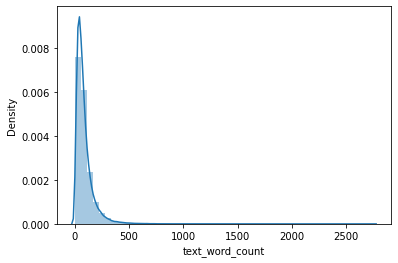

In [381]:
#Looks like the data is skewed to the right. We can transform this data using log transformation techniques
sns.distplot(df_new['text_word_count'])

In [382]:
df_new['text_word_count_log'] = np.log(df_new['text_word_count'])

c:\Users\abhis\Documents\feature-eng\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_word_count_log', ylabel='Density'>

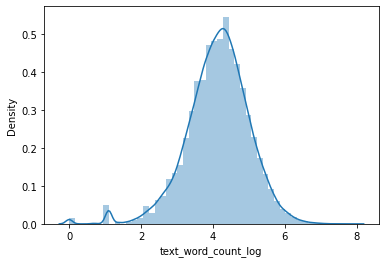

In [383]:
#Data for word count looks much better and centered now
sns.distplot(df_new['text_word_count_log'])

In [384]:
#Lets get how many characters we have for each text
df_new['text_char_count'] = df_new['text'].apply(lambda x:sum(len(word) for word in str(x).split(" ")))
df_new['text_char_log'] = np.log(df_new['text_char_count'])

c:\Users\abhis\Documents\feature-eng\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


c:\Users\abhis\Documents\feature-eng\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_char_count', ylabel='Density'>

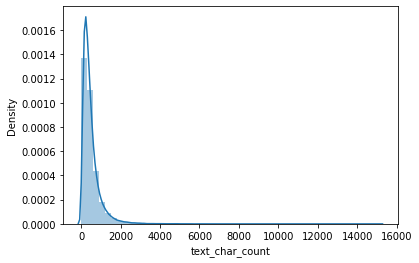

In [385]:
# Right skewed data again in char count
sns.distplot(df_new['text_char_count'])

In [364]:
# Log transformation for the character count to center the data
# sns.distplot(df_new['text_char_log'])

In [386]:
#Average word count
df_new['avg_word_cnt'] = df_new['text_char_count']/df_new['text_word_count']

In [387]:
#Unique words
df_new['unq_words'] = df_new['text'].str.lower().str.split().apply(set).str.len()

c:\Users\abhis\Documents\feature-eng\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unq_words', ylabel='Density'>

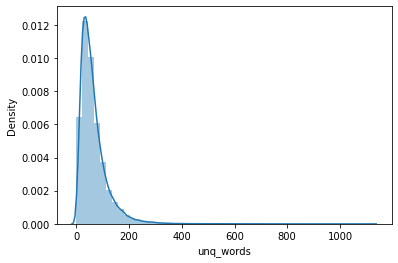

In [406]:
sns.distplot(df_new['unq_words'])

In [407]:
df_new['unq_words_log'] = np.log(df_new['unq_words'])

c:\Users\abhis\Documents\feature-eng\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [409]:
df_new['unq_words_log'].head()

0    4.234107
1    3.637586
2    3.091042
3    4.394449
4    4.430817
Name: unq_words_log, dtype: float64

In [388]:
df_new.head()

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,...,shape_binned,airbase_name,state_name,airbase,text_word_count,text_word_count_log,text_char_count,text_char_log,avg_word_cnt,unq_words
0,1.0,Chester,VA,2019-12-12 18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,...,light,NaN,NaN,0,96,4.564348,507,6.228511,5.281250,69
1,2.0,Rocky Hill,CT,2019-03-22 18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,...,circular,NaN,NaN,0,39,3.663562,192,5.257495,4.923077,38
2,4.0,Ottawa,ON,2019-04-17 02:00:00,teardrop,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,http://www.nuforc.org/webreports/145/S145697.html,driving towards intersection fallowfield eagle...,2019-04-18T00:00:00,45.381383,...,other,NaN,NaN,0,23,3.135494,146,4.983607,6.347826,22
3,5.0,Peoria,NY,2009-03-15 18:00:00,cigar,[Occurred : 3/15/2009 18:00 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145723.html,peoria arizona saw cigar shaped craft floating...,2019-04-18T00:00:00,NaN,...,circular,NaN,NaN,0,103,4.634729,570,6.345636,5.533981,81
4,6.0,Kirbyville,TX,2019-04-02 20:25:00,disk,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,http://www.nuforc.org/webreports/145/S145476.html,object flashing light green blue red white lig...,2019-04-08T00:00:00,30.677200,...,circular,NaN,NaN,0,124,4.820282,711,6.566672,5.733871,84


# Satellites

One of the interesting elements within this data is that some of the sightings are likely to be other objects such as: planes, meteors or satellites. Our group was interested in determining whether or not we could bring in data regarding satellites and meteors into our analysis. To do this, we focused on the International Space Station (ISS). Our preprocessing is within another notebook called Feature_Engineering_Project_ISS.ipynb.


Our process to pull in the data was to obtain the TLE (Two Line Elements) data for the ISS and then to process that information using a package called Skyfield, which can be used to estimate the position of the ISS. Getting this data in, we can then identify whether or not the ISS is nearby for observations that are after 1998 (when the ISS was launched). The data for the TLEs was obtained via http://celestrak.com.

In [190]:
# from skyfield.api import load, wgs84, EarthSatellite
# import pickle
# import timezonefinder
# import dateutil

In [191]:
# # here let's open the space station data
# with open('/Users/rahimjiwa/Documents/Github/feature-engineering/data/UFO/zarya.txt', 'rb') as file:
#     zarya = pickle.load(file)

In [192]:
# # we can take a look
# zarya[0:5]

['1 25544U 98067A   98324.28472222 -.00003657  11563-4  00000+0 0    10',
 '2 25544  51.5908 168.3788 0125362  86.4185 359.7454 16.05064833    05',
 '1 25544U 98067A   98324.33235038  .11839616  11568-4  57349-2 0    28',
 '2 25544  51.6173 168.1099 0123410  88.0187 273.4932 16.04971811    11',
 '1 25544U 98067A   98324.45674522 -.00043259  11566-4 -18040-4 0    32']

In [193]:
# # since we have tle, we need zarya to be split in the tle records
# N = 2
# zarya = [zarya[n:n+N] for n in range(0, len(zarya), N)]
# zarya[:6] 

[['1 25544U 98067A   98324.28472222 -.00003657  11563-4  00000+0 0    10',
  '2 25544  51.5908 168.3788 0125362  86.4185 359.7454 16.05064833    05'],
 ['1 25544U 98067A   98324.33235038  .11839616  11568-4  57349-2 0    28',
  '2 25544  51.6173 168.1099 0123410  88.0187 273.4932 16.04971811    11'],
 ['1 25544U 98067A   98324.45674522 -.00043259  11566-4 -18040-4 0    32',
  '2 25544  51.5914 167.4317 0125858  91.3429 269.4598 16.05134416    30'],
 ['1 25544U 98067A   98324.51913017  .00713053  11562-4  34316-3 0    48',
  '2 25544  51.5959 167.1152 0123861  87.8179 273.5890 16.05002967    44'],
 ['1 25544U 98067A   98324.58140904  .00632617  11564-4  30202-3 0    62',
  '2 25544  51.5951 166.7799 0123964  88.1727 273.3425 16.05074568    54'],
 ['1 25544U 98067A   98324.64367013  .00537185  11565-4  25489-3 0    78',
  '2 25544  51.5937 166.4421 0124158  88.3525 273.1690 16.05111828    65']]

In [194]:
# # lets make a copy of our dataframe
# df_iss = df.copy()
# df_iss.head()

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,city_longitude,Duration,summary_notes,text_notes,Reported_stats,city_state,coord,date_time_2,time_difference,reporting_lag
0,1.0,Chester,VA,2019-12-12T18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,-77.408582,seconds,[],[],2019-12-19 19:19:31,"(Chester, VA)","(37.34315152, -77.40858182)",2019-12-12 18:43:00,7 days 00:36:31,weeks
1,2.0,Rocky Hill,CT,2019-03-22T18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,-72.639300,seconds,[],[],2019-03-27 16:10:19,"(Rocky Hill, CT)","(41.6648, -72.6393)",2019-03-22 18:30:00,4 days 21:40:19,days
3,4.0,Ottawa,ON,2019-04-17T02:00:00,teardrop,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,http://www.nuforc.org/webreports/145/S145697.html,driving towards intersection fallowfield eagle...,2019-04-18T00:00:00,45.381383,-75.708501,seconds,[],[],2019-04-17 08:41:25,"(Ottawa, ON)","(45.3813825, -75.70850071)",2019-04-17 02:00:00,0 days 06:41:25,hours
4,5.0,Peoria,NY,2009-03-15T18:00:00,cigar,[Occurred : 3/15/2009 18:00 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145723.html,peoria arizona saw cigar shaped craft floating...,2019-04-18T00:00:00,NaN,NaN,minutes,[],[],2019-04-17 18:30:52,"(Peoria, NY)","(nan, nan)",2009-03-15 18:00:00,3685 days 00:30:52,years
5,6.0,Kirbyville,TX,2019-04-02T20:25:00,disk,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,http://www.nuforc.org/webreports/145/S145476.html,object flashing light green blue red white lig...,2019-04-08T00:00:00,30.677200,-94.005200,minutes,[],"[((ADDENDUM FROM WITNESS)), ((END ADDENDUM)), ...",2019-04-03 18:36:52,"(Kirbyville, TX)","(30.6772, -94.0052)",2019-04-02 20:25:00,0 days 22:11:52,hours


In [195]:
# # for the purpose of our analysis, we won't need some of these columns
# df_iss.drop(columns=['shape','report_link','text','posted','Duration','summary_notes','text_notes'],inplace=True)

In [196]:
# df_iss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81460 entries, 0 to 88123
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Text_ID          81460 non-null  float64        
 1   city             81460 non-null  object         
 2   state            81460 non-null  object         
 3   date_time        80429 non-null  object         
 4   stats            81460 non-null  object         
 5   city_latitude    70907 non-null  float64        
 6   city_longitude   70907 non-null  float64        
 7   Reported_stats   81460 non-null  object         
 8   city_state       81460 non-null  object         
 9   coord            81460 non-null  object         
 10  date_time_2      80429 non-null  datetime64[ns] 
 11  time_difference  79092 non-null  timedelta64[ns]
 12  reporting_lag    79092 non-null  category       
dtypes: category(1), datetime64[ns](1), float64(3), object(7), timedelta64[ns](1)

In [197]:
# # for simplicity, let's get rid of the NaNs
# df_iss.dropna(inplace=True)
# df_iss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68969 entries, 0 to 86713
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Text_ID          68969 non-null  float64        
 1   city             68969 non-null  object         
 2   state            68969 non-null  object         
 3   date_time        68969 non-null  object         
 4   stats            68969 non-null  object         
 5   city_latitude    68969 non-null  float64        
 6   city_longitude   68969 non-null  float64        
 7   Reported_stats   68969 non-null  object         
 8   city_state       68969 non-null  object         
 9   coord            68969 non-null  object         
 10  date_time_2      68969 non-null  datetime64[ns] 
 11  time_difference  68969 non-null  timedelta64[ns]
 12  reporting_lag    68969 non-null  category       
dtypes: category(1), datetime64[ns](1), float64(3), object(7), timedelta64[ns](1)

In [198]:
# # let's start by adding in the timezone from the coordinates
# tf = timezonefinder.TimezoneFinder()
# def get_timezone(lat, lon):
#   timezone_str = tf.certain_timezone_at(lat=lat, lng=lon)
#   return timezone_str

In [199]:
# # this will get the timezones for all the instances
# df_iss['timezone'] = df_iss.apply(lambda row: get_timezone(row['city_latitude'], row['city_longitude']), axis=1)

In [200]:
# df_iss.head()

,Text_ID,city,state,date_time,stats,city_latitude,city_longitude,Reported_stats,city_state,coord,date_time_2,time_difference,reporting_lag,timezone
0,1.0,Chester,VA,2019-12-12T18:43:00,[Occurred : 12/12/2019 18:43 (Entered as : 12...,37.343152,-77.408582,2019-12-19 19:19:31,"(Chester, VA)","(37.34315152, -77.40858182)",2019-12-12 18:43:00,7 days 00:36:31,weeks,America/New_York
1,2.0,Rocky Hill,CT,2019-03-22T18:30:00,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,41.664800,-72.639300,2019-03-27 16:10:19,"(Rocky Hill, CT)","(41.6648, -72.6393)",2019-03-22 18:30:00,4 days 21:40:19,days,America/New_York
3,4.0,Ottawa,ON,2019-04-17T02:00:00,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,45.381383,-75.708501,2019-04-17 08:41:25,"(Ottawa, ON)","(45.3813825, -75.70850071)",2019-04-17 02:00:00,0 days 06:41:25,hours,America/Toronto
5,6.0,Kirbyville,TX,2019-04-02T20:25:00,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,30.677200,-94.005200,2019-04-03 18:36:52,"(Kirbyville, TX)","(30.6772, -94.0052)",2019-04-02 20:25:00,0 days 22:11:52,hours,America/Chicago
6,7.0,Tucson,AZ,2019-05-01T11:00:00,[Occurred : 5/1/2019 11:00 (Entered as : 5/1/...,32.259941,-110.927542,2019-05-01 11:26:56,"(Tucson, AZ)","(32.25994076, -110.9275423)",2019-05-01 11:00:00,0 days 00:26:56,hours,America/Phoenix


In [201]:
# # we need to convert time to utc
# def time_to_utc(time, timezone):
#     x = arrow.get(time, 'YYYY-M-DTHH:mm:ss').replace(tzinfo=dateutil.tz.gettz(timezone))
#     x = x.to('utc')
#     #x = x.naive
#     x = x.datetime
#     return x

In [202]:
# df_iss['utc'] = df_iss.apply(lambda row: time_to_utc(row['date_time'], row['timezone']), axis=1)
# df_iss.head()

,Text_ID,city,state,date_time,stats,city_latitude,city_longitude,Reported_stats,city_state,coord,date_time_2,time_difference,reporting_lag,timezone,utc
0,1.0,Chester,VA,2019-12-12T18:43:00,[Occurred : 12/12/2019 18:43 (Entered as : 12...,37.343152,-77.408582,2019-12-19 19:19:31,"(Chester, VA)","(37.34315152, -77.40858182)",2019-12-12 18:43:00,7 days 00:36:31,weeks,America/New_York,2019-12-12 23:43:00+00:00
1,2.0,Rocky Hill,CT,2019-03-22T18:30:00,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,41.664800,-72.639300,2019-03-27 16:10:19,"(Rocky Hill, CT)","(41.6648, -72.6393)",2019-03-22 18:30:00,4 days 21:40:19,days,America/New_York,2019-03-22 22:30:00+00:00
3,4.0,Ottawa,ON,2019-04-17T02:00:00,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,45.381383,-75.708501,2019-04-17 08:41:25,"(Ottawa, ON)","(45.3813825, -75.70850071)",2019-04-17 02:00:00,0 days 06:41:25,hours,America/Toronto,2019-04-17 06:00:00+00:00
5,6.0,Kirbyville,TX,2019-04-02T20:25:00,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,30.677200,-94.005200,2019-04-03 18:36:52,"(Kirbyville, TX)","(30.6772, -94.0052)",2019-04-02 20:25:00,0 days 22:11:52,hours,America/Chicago,2019-04-03 01:25:00+00:00
6,7.0,Tucson,AZ,2019-05-01T11:00:00,[Occurred : 5/1/2019 11:00 (Entered as : 5/1/...,32.259941,-110.927542,2019-05-01 11:26:56,"(Tucson, AZ)","(32.25994076, -110.9275423)",2019-05-01 11:00:00,0 days 00:26:56,hours,America/Phoenix,2019-05-01 18:00:00+00:00


In [203]:
# # okay let's get the zarya epochs and figure out how to compare them
# df_zarya = pd.DataFrame({'tle':zarya})
# df_zarya.head()

,tle
0,[1 25544U 98067A 98324.28472222 -.00003657 ...
1,[1 25544U 98067A 98324.33235038 .11839616 ...
2,[1 25544U 98067A 98324.45674522 -.00043259 ...
3,[1 25544U 98067A 98324.51913017 .00713053 ...
4,[1 25544U 98067A 98324.58140904 .00632617 ...


In [204]:
# # this function will go through the tle data, and will return us with the data the epoch is for
# def get_time_epoch(tle):
#     ts = load.timescale()
#     line1 = tle[0]
#     line2 = tle[1]
#     satellite = EarthSatellite(line1, line2, 'ISS (ZARYA)', ts)
#     time = satellite.epoch.utc_datetime()
#     #time = time.replace(tzinfo=None)
#     return time

In [205]:
# # lets create a column with the times
# df_zarya['epoch_time'] = df_zarya.apply(lambda row: get_time_epoch(row ['tle']), axis=1)
# df_zarya.head()

,tle,epoch_time
0,[1 25544U 98067A 98324.28472222 -.00003657 ...,1998-11-20 06:49:59.999817+00:00
1,[1 25544U 98067A 98324.33235038 .11839616 ...,1998-11-20 07:58:35.072815+00:00
2,[1 25544U 98067A 98324.45674522 -.00043259 ...,1998-11-20 10:57:42.786987+00:00
3,[1 25544U 98067A 98324.51913017 .00713053 ...,1998-11-20 12:27:32.846680+00:00
4,[1 25544U 98067A 98324.58140904 .00632617 ...,1998-11-20 13:57:13.741058+00:00


In [206]:
# # lets get the date from the times
# df_zarya['date'] = df_zarya.apply(lambda row: row['epoch_time'].date(), axis=1)
# df_zarya.head()

,tle,epoch_time,date
0,[1 25544U 98067A 98324.28472222 -.00003657 ...,1998-11-20 06:49:59.999817+00:00,1998-11-20
1,[1 25544U 98067A 98324.33235038 .11839616 ...,1998-11-20 07:58:35.072815+00:00,1998-11-20
2,[1 25544U 98067A 98324.45674522 -.00043259 ...,1998-11-20 10:57:42.786987+00:00,1998-11-20
3,[1 25544U 98067A 98324.51913017 .00713053 ...,1998-11-20 12:27:32.846680+00:00,1998-11-20
4,[1 25544U 98067A 98324.58140904 .00632617 ...,1998-11-20 13:57:13.741058+00:00,1998-11-20


In [207]:
# here, we are dropping the duplicate dates and only keeping the last one
# the reason is, the dates can be used to estimate the epochs nearby,
# we are assuming the last one is the most accurate
# furthermore, it would be expensive to try to match, each instance with the epochs and find the closest one
# by limiting to one per day, we'll speed this up
# df_zarya.drop_duplicates(subset='date', keep='last', inplace=True)
# df_zarya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 6 to 41844
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tle         8399 non-null   object             
 1   epoch_time  8399 non-null   datetime64[ns, UTC]
 2   date        8399 non-null   object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 262.5+ KB


In [208]:
# # lets get the time of the first epoch
# first_epoch = df_zarya['epoch_time'].to_list()
# first_epoch = first_epoch[0]

In [209]:
# # now the iss information really doesn't help for instances where the
# df_iss = df_iss[df_iss['utc'] > first_epoch]
# df_iss.sort_values(by='utc')

,Text_ID,city,state,date_time,stats,city_latitude,city_longitude,Reported_stats,city_state,coord,date_time_2,time_difference,reporting_lag,timezone,utc
58577,58578.0,Dillsburg,PA,1998-11-20T20:00:00,[Occurred : 11/20/1998 20:00 (Entered as : 11...,40.081100,-77.031400,2014-08-28 14:59:20,"(Dillsburg, PA)","(40.0811, -77.0314)",1998-11-20 20:00:00,5759 days 18:59:20,years,America/New_York,1998-11-21 01:00:00+00:00
81934,81935.0,Point Pleasant,WV,1998-11-24T16:00:00,[Occurred : 11/24/1998 16:00 (Entered as : 11...,38.861900,-82.073000,2018-08-20 18:54:19,"(Point Pleasant, WV)","(38.8619, -82.073)",1998-11-24 16:00:00,7209 days 02:54:19,years,America/New_York,1998-11-24 21:00:00+00:00
5538,5539.0,Waterford,WI,1998-12-15T00:00:00,[Occurred : 12/15/1998 00:00 (Entered as : 00...,42.787000,-88.209100,2007-06-26 17:12:52,"(Waterford, WI)","(42.787, -88.2091)",1998-12-15 00:00:00,3115 days 17:12:52,years,America/Chicago,1998-12-15 06:00:00+00:00
15667,15668.0,Fairbanks,AK,1998-12-15T20:00:00,[Occurred : 12/15/1998 20:00 (Entered as : 98...,64.845276,-147.834739,2009-09-05 23:35:51,"(Fairbanks, AK)","(64.84527636, -147.8347388)",1998-12-15 20:00:00,3917 days 03:35:51,years,America/Anchorage,1998-12-16 05:00:00+00:00
306,307.0,Boca Grande,FL,1998-12-18T22:00:00,[Occurred : 12/18/1998 22:00 (Entered as : 12...,26.764100,-82.264300,2006-03-17 19:29:11,"(Boca Grande, FL)","(26.7641, -82.2643)",1998-12-18 22:00:00,2645 days 21:29:11,years,America/New_York,1998-12-19 03:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3900.0,Salinas,CA,2019-12-22T18:00:00,[Occurred : 12/22/2019 18:00 (Entered as : 12...,36.688525,-121.628455,2007-09-02 23:30:25,"(Salinas, CA)","(36.68852458, -121.6284548)",2019-12-22 18:00:00,4493 days 18:29:35,years,America/Los_Angeles,2019-12-23 02:00:00+00:00
3900,3901.0,Castro Valley,CA,2019-12-22T18:10:00,[Occurred : 12/22/2019 18:10 (Entered as : 12...,37.705756,-122.069713,2007-08-19 13:25:49,"(Castro Valley, CA)","(37.70575633, -122.0697127)",2019-12-22 18:10:00,4508 days 04:44:11,years,America/Los_Angeles,2019-12-23 02:10:00+00:00
3940,3941.0,Kennett Square,PA,2019-12-22T22:15:00,[Occurred : 12/22/2019 22:15 (Entered as : 12...,39.846800,-75.711600,2006-08-03 13:54:48,"(Kennett Square, PA)","(39.8468, -75.7116)",2019-12-22 22:15:00,4889 days 08:20:12,years,America/New_York,2019-12-23 03:15:00+00:00
3941,3942.0,Clarkston,MI,2019-12-22T23:00:00,[Occurred : 12/22/2019 23:00 (Entered as : 12...,42.739865,-83.417150,2006-08-11 12:30:29,"(Clarkston, MI)","(42.73986514, -83.41715029)",2019-12-22 23:00:00,4881 days 10:29:31,years,America/Detroit,2019-12-23 04:00:00+00:00


In [210]:
# # lets get the date info here, we can then use this to join our data
# df_iss['date'] = df_iss.apply(lambda row: row['utc'].date(), axis=1)
# df_iss.head()

,Text_ID,city,state,date_time,stats,city_latitude,city_longitude,Reported_stats,city_state,coord,date_time_2,time_difference,reporting_lag,timezone,utc,date
0,1.0,Chester,VA,2019-12-12T18:43:00,[Occurred : 12/12/2019 18:43 (Entered as : 12...,37.343152,-77.408582,2019-12-19 19:19:31,"(Chester, VA)","(37.34315152, -77.40858182)",2019-12-12 18:43:00,7 days 00:36:31,weeks,America/New_York,2019-12-12 23:43:00+00:00,2019-12-12
1,2.0,Rocky Hill,CT,2019-03-22T18:30:00,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,41.664800,-72.639300,2019-03-27 16:10:19,"(Rocky Hill, CT)","(41.6648, -72.6393)",2019-03-22 18:30:00,4 days 21:40:19,days,America/New_York,2019-03-22 22:30:00+00:00,2019-03-22
3,4.0,Ottawa,ON,2019-04-17T02:00:00,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,45.381383,-75.708501,2019-04-17 08:41:25,"(Ottawa, ON)","(45.3813825, -75.70850071)",2019-04-17 02:00:00,0 days 06:41:25,hours,America/Toronto,2019-04-17 06:00:00+00:00,2019-04-17
5,6.0,Kirbyville,TX,2019-04-02T20:25:00,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,30.677200,-94.005200,2019-04-03 18:36:52,"(Kirbyville, TX)","(30.6772, -94.0052)",2019-04-02 20:25:00,0 days 22:11:52,hours,America/Chicago,2019-04-03 01:25:00+00:00,2019-04-03
6,7.0,Tucson,AZ,2019-05-01T11:00:00,[Occurred : 5/1/2019 11:00 (Entered as : 5/1/...,32.259941,-110.927542,2019-05-01 11:26:56,"(Tucson, AZ)","(32.25994076, -110.9275423)",2019-05-01 11:00:00,0 days 00:26:56,hours,America/Phoenix,2019-05-01 18:00:00+00:00,2019-05-01


In [211]:
# # merged df
# merged_df = pd.merge(df_iss, df_zarya, on='date')
# merged_df.head()

,Text_ID,city,state,date_time,stats,city_latitude,city_longitude,Reported_stats,city_state,coord,date_time_2,time_difference,reporting_lag,timezone,utc,date,tle,epoch_time
0,1.0,Chester,VA,2019-12-12T18:43:00,[Occurred : 12/12/2019 18:43 (Entered as : 12...,37.343152,-77.408582,2019-12-19 19:19:31,"(Chester, VA)","(37.34315152, -77.40858182)",2019-12-12 18:43:00,7 days 00:36:31,weeks,America/New_York,2019-12-12 23:43:00+00:00,2019-12-12,[1 25544U 98067A 19346.93506944 -.00000088 ...,2019-12-12 22:26:29.999603+00:00
1,3824.0,Waldorf,MD,2019-12-12T18:30:00,[Occurred : 12/12/2019 18:30 (Entered as : 12...,38.611997,-76.906551,2019-12-21 18:11:11,"(Waldorf, MD)","(38.61199693, -76.90655119)",2019-12-12 18:30:00,8 days 23:41:11,weeks,America/New_York,2019-12-12 23:30:00+00:00,2019-12-12,[1 25544U 98067A 19346.93506944 -.00000088 ...,2019-12-12 22:26:29.999603+00:00
2,2.0,Rocky Hill,CT,2019-03-22T18:30:00,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,41.664800,-72.639300,2019-03-27 16:10:19,"(Rocky Hill, CT)","(41.6648, -72.6393)",2019-03-22 18:30:00,4 days 21:40:19,days,America/New_York,2019-03-22 22:30:00+00:00,2019-03-22,[1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00
3,3413.0,Windsor,CA,2019-03-21T23:00:00,[Occurred : 3/21/2019 23:00 (Entered as : 3/2...,38.536900,-122.812300,2019-03-31 08:34:56,"(Windsor, CA)","(38.5369, -122.8123)",2019-03-21 23:00:00,9 days 09:34:56,weeks,America/Los_Angeles,2019-03-22 06:00:00+00:00,2019-03-22,[1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00
4,3728.0,Nampa,ID,2019-03-21T19:30:00,[Occurred : 3/21/2019 19:30 (Entered as : 03/...,43.568919,-116.561976,2019-03-29 04:26:59,"(Nampa, ID)","(43.56891901, -116.5619761)",2019-03-21 19:30:00,7 days 08:56:59,weeks,America/Boise,2019-03-22 01:30:00+00:00,2019-03-22,[1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00


In [212]:
# merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65698 entries, 0 to 65697
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype                  
---  ------           --------------  -----                  
 0   Text_ID          65698 non-null  float64                
 1   city             65698 non-null  object                 
 2   state            65698 non-null  object                 
 3   date_time        65698 non-null  object                 
 4   stats            65698 non-null  object                 
 5   city_latitude    65698 non-null  float64                
 6   city_longitude   65698 non-null  float64                
 7   Reported_stats   65698 non-null  object                 
 8   city_state       65698 non-null  object                 
 9   coord            65698 non-null  object                 
 10  date_time_2      65698 non-null  datetime64[ns]         
 11  time_difference  65698 non-null  timedelta64[ns]        
 12  reporting_lag    6

In [213]:
# # look at tle data
# merged_df['tle'][0]

['1 25544U 98067A   19346.93506944 -.00000088  00000-0  64965-5 0  9995',
 '2 25544  51.6425 195.1413 0007371  28.2970 176.8850 15.50119535202986']

In [214]:
# # check the time
# merged_df['utc'][0]

Timestamp('2019-12-12 23:43:00+0000', tz='tzutc()')

In [215]:
# # function to get us the iss coord from the tle data
# def iss_cord(tle, utc):
#     ts=load.timescale()
#     line1 = tle[0]
#     line2 = tle[1]
#     satellite = EarthSatellite(line1, line2, 'ISS (ZARYA)', ts)
#     t = ts.from_datetime(utc)
#     geocentric = satellite.at(t)
#     lat, lon = wgs84.latlon_of(geocentric)
#     coord = ('{:.4f}'.format(lat.degrees),'{:.4f}'.format(lon.degrees))
#     return coord


In [216]:
# #test
# iss_cord(merged_df['tle'][0], merged_df['utc'][0])

('29.0182', '-88.1384')

In [217]:
# # lets apply our function to the dataframe
# merged_df['iss_cord'] = merged_df.apply(lambda row: iss_cord(row['tle'], row['utc']), axis=1)

In [218]:
#merged_df['coords'] = merged_df.apply(lambda row: create_coord(row['city_latitude'], row['city_longitude']), axis=1)
#merged_df.head()

In [219]:
# identify if the iss is flying overhead nearby
# here we made assumptions about 3 degrees each way
# the reality now that we have learned more about space is that it is a little more
# complicated than that
# def iss_nearby(arg1, arg2):
#     if abs(float(arg1[0]) - float(arg2[0])) <= 3:
#         if abs(float(arg1[1]) - float(arg2[1])) <= 3:
#             return True
#         else:
#             return False
#     else:
#         return False

In [220]:
# # apply the iss nearby function
# merged_df['iss_nearby'] = merged_df.apply(lambda row: iss_nearby(row['coord'], row['iss_cord']), axis=1)
# merged_df.head()

,Text_ID,city,state,date_time,stats,city_latitude,city_longitude,Reported_stats,city_state,coord,date_time_2,time_difference,reporting_lag,timezone,utc,date,tle,epoch_time,iss_cord,iss_nearby
0,1.0,Chester,VA,2019-12-12T18:43:00,[Occurred : 12/12/2019 18:43 (Entered as : 12...,37.343152,-77.408582,2019-12-19 19:19:31,"(Chester, VA)","(37.34315152, -77.40858182)",2019-12-12 18:43:00,7 days 00:36:31,weeks,America/New_York,2019-12-12 23:43:00+00:00,2019-12-12,[1 25544U 98067A 19346.93506944 -.00000088 ...,2019-12-12 22:26:29.999603+00:00,"(29.0182, -88.1384)",False
1,3824.0,Waldorf,MD,2019-12-12T18:30:00,[Occurred : 12/12/2019 18:30 (Entered as : 12...,38.611997,-76.906551,2019-12-21 18:11:11,"(Waldorf, MD)","(38.61199693, -76.90655119)",2019-12-12 18:30:00,8 days 23:41:11,weeks,America/New_York,2019-12-12 23:30:00+00:00,2019-12-12,[1 25544U 98067A 19346.93506944 -.00000088 ...,2019-12-12 22:26:29.999603+00:00,"(51.7733, -146.5292)",False
2,2.0,Rocky Hill,CT,2019-03-22T18:30:00,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,41.664800,-72.639300,2019-03-27 16:10:19,"(Rocky Hill, CT)","(41.6648, -72.6393)",2019-03-22 18:30:00,4 days 21:40:19,days,America/New_York,2019-03-22 22:30:00+00:00,2019-03-22,[1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00,"(-38.9642, 131.8882)",False
3,3413.0,Windsor,CA,2019-03-21T23:00:00,[Occurred : 3/21/2019 23:00 (Entered as : 3/2...,38.536900,-122.812300,2019-03-31 08:34:56,"(Windsor, CA)","(38.5369, -122.8123)",2019-03-21 23:00:00,9 days 09:34:56,weeks,America/Los_Angeles,2019-03-22 06:00:00+00:00,2019-03-22,[1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00,"(-10.2320, 155.7894)",False
4,3728.0,Nampa,ID,2019-03-21T19:30:00,[Occurred : 3/21/2019 19:30 (Entered as : 03/...,43.568919,-116.561976,2019-03-29 04:26:59,"(Nampa, ID)","(43.56891901, -116.5619761)",2019-03-21 19:30:00,7 days 08:56:59,weeks,America/Boise,2019-03-22 01:30:00+00:00,2019-03-22,[1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00,"(14.1956, -115.9423)",False


In [221]:
# # how many instances have the iss nearby
# merged_df['iss_nearby'].value_counts()

False    65544
True       154
Name: iss_nearby, dtype: int64

In [224]:
# merged_df.to_csv('/Users/rahimjiwa/Documents/Github/feature-engineering/data/UFO/data_with_iss.csv')

In [389]:
# to not have to run all the above you can get the data using
df_iss = pd.read_csv('data_with_iss.csv')


In [395]:
df_iss.head(10)

,Unnamed: 0,Text_ID,city,state,date_time,stats,city_latitude,city_longitude,Reported_stats,city_state,...,date_time_2,time_difference,reporting_lag,timezone,utc,date,tle,epoch_time,iss_cord,iss_nearby
0,0,1.0,Chester,VA,2019-12-12T18:43:00,['Occurred : 12/12/2019 18:43 (Entered as : 1...,37.343152,-77.408582,2019-12-19 19:19:31,"('Chester', 'VA')",...,2019-12-12 18:43:00,7 days 00:36:31,weeks,America/New_York,2019-12-12 23:43:00+00:00,2019-12-12,['1 25544U 98067A 19346.93506944 -.00000088 ...,2019-12-12 22:26:29.999603+00:00,"('29.0182', '-88.1384')",False
1,1,3824.0,Waldorf,MD,2019-12-12T18:30:00,['Occurred : 12/12/2019 18:30 (Entered as : 1...,38.611997,-76.906551,2019-12-21 18:11:11,"('Waldorf', 'MD')",...,2019-12-12 18:30:00,8 days 23:41:11,weeks,America/New_York,2019-12-12 23:30:00+00:00,2019-12-12,['1 25544U 98067A 19346.93506944 -.00000088 ...,2019-12-12 22:26:29.999603+00:00,"('51.7733', '-146.5292')",False
2,2,2.0,Rocky Hill,CT,2019-03-22T18:30:00,['Occurred : 3/22/2019 18:30 (Entered as : 03...,41.664800,-72.639300,2019-03-27 16:10:19,"('Rocky Hill', 'CT')",...,2019-03-22 18:30:00,4 days 21:40:19,days,America/New_York,2019-03-22 22:30:00+00:00,2019-03-22,['1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00,"('-38.9642', '131.8882')",False
3,3,3413.0,Windsor,CA,2019-03-21T23:00:00,['Occurred : 3/21/2019 23:00 (Entered as : 3/...,38.536900,-122.812300,2019-03-31 08:34:56,"('Windsor', 'CA')",...,2019-03-21 23:00:00,9 days 09:34:56,weeks,America/Los_Angeles,2019-03-22 06:00:00+00:00,2019-03-22,['1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00,"('-10.2320', '155.7894')",False
4,4,3728.0,Nampa,ID,2019-03-21T19:30:00,['Occurred : 3/21/2019 19:30 (Entered as : 03...,43.568919,-116.561976,2019-03-29 04:26:59,"('Nampa', 'ID')",...,2019-03-21 19:30:00,7 days 08:56:59,weeks,America/Boise,2019-03-22 01:30:00+00:00,2019-03-22,['1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00,"('14.1956', '-115.9423')",False
5,5,3729.0,Memphis,TN,2019-03-21T22:28:00,['Occurred : 3/21/2019 22:28 (Entered as : 03...,35.125473,-89.926925,2019-12-21 20:49:14,"('Memphis', 'TN')",...,2019-03-21 22:28:00,274 days 22:21:14,months,America/Chicago,2019-03-22 03:28:00+00:00,2019-03-22,['1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00,"('44.6451', '-28.4298')",False
6,6,3730.0,Elizabeth,IN,2019-03-22T00:00:00,['Occurred : 3/22/2019 (Entered as : 3/22/19...,38.104700,-85.986400,2019-12-18 22:24:17,"('Elizabeth', 'IN')",...,2019-03-22 00:00:00,271 days 22:24:17,months,America/Kentucky/Louisville,2019-03-22 04:00:00+00:00,2019-03-22,['1 25544U 98067A 19081.91354657 .00001745 ...,2019-03-22 21:55:30.423645+00:00,"('-43.4881', '62.7452')",False
7,7,4.0,Ottawa,ON,2019-04-17T02:00:00,['Occurred : 4/17/2019 02:00 (Entered as : 04...,45.381383,-75.708501,2019-04-17 08:41:25,"('Ottawa', 'ON')",...,2019-04-17 02:00:00,0 days 06:41:25,hours,America/Toronto,2019-04-17 06:00:00+00:00,2019-04-17,['1 25544U 98067A 19107.92643309 .00001649 ...,2019-04-17 22:14:03.819000+00:00,"('-31.8150', '-20.1877')",False
8,8,3172.0,Kingwood,TX,2019-04-16T20:30:00,['Occurred : 4/16/2019 20:30 (Entered as : 04...,30.033600,-95.261000,2019-04-21 19:45:47,"('Kingwood', 'TX')",...,2019-04-16 20:30:00,4 days 23:15:47,days,America/Chicago,2019-04-17 01:30:00+00:00,2019-04-17,['1 25544U 98067A 19107.92643309 .00001649 ...,2019-04-17 22:14:03.819000+00:00,"('-8.4394', '70.9485')",False
9,9,3173.0,Watsonville,CA,2019-04-17T14:44:00,['Occurred : 4/17/2019 14:44 (Entered as : 04...,36.950275,-121.724742,2019-04-22 11:34:04,"('Watsonville', 'CA')",...,2019-04-17 14:44:00,4 days 20:50:04,days,America/Los_Angeles,2019-04-17 21:44:00+00:00,2019-04-17,['1 25544U 98067A 19107.92643309 .00001649 ...,2019-04-17 22:14:03.819000+00:00,"('19.0266', '144.8748')",False


In [399]:
df_iss[df_iss['Text_ID']=='88121.0']

,Unnamed: 0,Text_ID,city,state,date_time,stats,city_latitude,city_longitude,Reported_stats,city_state,...,date_time_2,time_difference,reporting_lag,timezone,utc,date,tle,epoch_time,iss_cord,iss_nearby


In [392]:
test_df = df_new.copy(deep=True)

In [393]:
test_df = pd.merge(test_df,df_iss[['Text_ID','iss_nearby']],on='Text_ID',how='left')

In [400]:
test_df['iss_nearby'].fillna(False, inplace = True)

In [403]:
df_new = pd.merge(df_new,df_iss[['Text_ID','iss_nearby']],on='Text_ID',how='left')

In [404]:
df_new['iss_nearby'].fillna(False, inplace = True)

In [410]:
df_new.head()

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,...,state_name,airbase,text_word_count,text_word_count_log,text_char_count,text_char_log,avg_word_cnt,unq_words,iss_nearby,unq_words_log
0,1.0,Chester,VA,2019-12-12 18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,...,NaN,0,96,4.564348,507,6.228511,5.281250,69,False,4.234107
1,2.0,Rocky Hill,CT,2019-03-22 18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,...,NaN,0,39,3.663562,192,5.257495,4.923077,38,False,3.637586
2,4.0,Ottawa,ON,2019-04-17 02:00:00,teardrop,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,http://www.nuforc.org/webreports/145/S145697.html,driving towards intersection fallowfield eagle...,2019-04-18T00:00:00,45.381383,...,NaN,0,23,3.135494,146,4.983607,6.347826,22,False,3.091042
3,5.0,Peoria,NY,2009-03-15 18:00:00,cigar,[Occurred : 3/15/2009 18:00 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145723.html,peoria arizona saw cigar shaped craft floating...,2019-04-18T00:00:00,NaN,...,NaN,0,103,4.634729,570,6.345636,5.533981,81,False,4.394449
4,6.0,Kirbyville,TX,2019-04-02 20:25:00,disk,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,http://www.nuforc.org/webreports/145/S145476.html,object flashing light green blue red white lig...,2019-04-08T00:00:00,30.677200,...,NaN,0,124,4.820282,711,6.566672,5.733871,84,False,4.430817


In [413]:
df_new['year'].head()

0    2019
1    2019
2    2019
3    2009
4    2019
Name: year, dtype: Int64

With our analysis, we can see that the ISS isn't nearby in many of the sightings. While this is disappointing as a results, as the expectation is that it would be able to explain more of the instances, it is possible that there are other space objects that could explain the sightings (ex: comets, meteors, stars, other satellites). We could extend what we have done here, to work with additional data from Celestrak containing other astrological phenomemon. This would be a next step. Another next step would be to take the sightings data and further it, by looking at visibility conditions, trying to determine a more precise estimation of location and come up with a better range for where it would be visibile nearby. Ideally, you would just like to have a column that identifies whether their are visible space objects near a given location, which we could then feed into a model.

# Alcohol Data

In [414]:
us_states = pd.read_csv('C:/Users/abhis/Documents/git_repo/feature-engineering/data/UFO/us_states.csv')

In [416]:
us_states = us_states.drop(['usa_state_latitude','usa_state_longitude'],axis=1)

In [420]:
us_states.columns

Index(['usa_state_code', 'usa_state'], dtype='object')

In [424]:
us_states = us_states.rename(columns = {'usa_state_code':'state'})

In [425]:
us_states.columns

Index(['state', 'usa_state'], dtype='object')

In [419]:
test_df = df_new.copy(deep=True)

In [426]:
test_df = pd.merge(test_df,us_states[['state','usa_state']],on='state',how='left')

In [427]:
test_df.head()

,Text_ID,city,state,date_time,shape,stats,report_link,text,posted,city_latitude,...,airbase,text_word_count,text_word_count_log,text_char_count,text_char_log,avg_word_cnt,unq_words,iss_nearby,unq_words_log,usa_state
0,1.0,Chester,VA,2019-12-12 18:43:00,light,[Occurred : 12/12/2019 18:43 (Entered as : 12...,http://www.nuforc.org/webreports/151/S151739.html,wife driving southeast fairly populated main s...,2019-12-22T00:00:00,37.343152,...,0,96,4.564348,507,6.228511,5.281250,69,False,4.234107,Virginia
1,2.0,Rocky Hill,CT,2019-03-22 18:30:00,circle,[Occurred : 3/22/2019 18:30 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145297.html,think may caught ufo nbc nightly news aired ma...,2019-03-29T00:00:00,41.664800,...,0,39,3.663562,192,5.257495,4.923077,38,False,3.637586,Connecticut
2,4.0,Ottawa,ON,2019-04-17 02:00:00,teardrop,[Occurred : 4/17/2019 02:00 (Entered as : 04-...,http://www.nuforc.org/webreports/145/S145697.html,driving towards intersection fallowfield eagle...,2019-04-18T00:00:00,45.381383,...,0,23,3.135494,146,4.983607,6.347826,22,False,3.091042,NaN
3,5.0,Peoria,NY,2009-03-15 18:00:00,cigar,[Occurred : 3/15/2009 18:00 (Entered as : 03/...,http://www.nuforc.org/webreports/145/S145723.html,peoria arizona saw cigar shaped craft floating...,2019-04-18T00:00:00,NaN,...,0,103,4.634729,570,6.345636,5.533981,81,False,4.394449,New York
4,6.0,Kirbyville,TX,2019-04-02 20:25:00,disk,[Occurred : 4/2/2019 20:25 (Entered as : 04/0...,http://www.nuforc.org/webreports/145/S145476.html,object flashing light green blue red white lig...,2019-04-08T00:00:00,30.677200,...,0,124,4.820282,711,6.566672,5.733871,84,False,4.430817,Texas


In [428]:
df_new = pd.merge(df_new,us_states[['state','usa_state']],on='state',how='left')

In [447]:
#import the alcohol dataset
alcohol_data = pd.read_csv('C:/Users/abhis\Documents/git_repo/feature-engineering/data/UFO/per_capita_alc.csv',encoding='ISO-8859-1')

In [448]:
alcohol_data['year'] = alcohol_data['year'].astype(int)

In [452]:
alcohol_data = alcohol_data.rename(columns={'state':'usa_state'})

In [461]:
test_df = df_new.copy(deep=True)

In [469]:
df_new['usa_state'] = df_new['usa_state'].str.lower()

In [471]:
df_new = pd.merge(df_new,alcohol_data[['year','usa_state','number_of_drinks_total']],on=['year','usa_state'],how='left')

In [474]:
df_new.columns

Index(['Text_ID', 'city', 'state', 'date_time', 'shape', 'stats',
       'report_link', 'text', 'posted', 'city_latitude', 'city_longitude',
       'Duration', 'summary_notes', 'text_notes', 'Reported_stats',
       'Occurred_stats', 'year', 'hour', 'time_of_day', 'city_state', 'coord',
       'time_difference', 'reporting_lag', 'shape_binned', 'airbase_name',
       'state_name', 'airbase', 'text_word_count', 'text_word_count_log',
       'text_char_count', 'text_char_log', 'avg_word_cnt', 'unq_words',
       'iss_nearby', 'unq_words_log', 'usa_state', 'number_of_drinks_total_x',
       'number_of_drinks_total_y'],
      dtype='object')

In [475]:
df_new = df_new.drop(['number_of_drinks_total_x'],axis=1)

# Final dataframe with the engineered columns

In [617]:
df_final = df_new[['Duration','state','hour','time_of_day','reporting_lag','shape_binned','airbase','text_word_count','text_char_count',
                    'text_word_count_log','text_char_log','avg_word_cnt','unq_words','unq_words_log','iss_nearby','number_of_drinks_total_y','year']]

In [618]:
df_final['number_of_drinks_total_y'].fillna(df_final['number_of_drinks_total_y'].median(),inplace=True)

c:\Users\abhis\Documents\feature-eng\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [619]:
df_final.head()

,Duration,state,hour,time_of_day,reporting_lag,shape_binned,airbase,text_word_count,text_char_count,text_word_count_log,text_char_log,avg_word_cnt,unq_words,unq_words_log,iss_nearby,number_of_drinks_total_y,year
0,seconds,VA,18,EVENING,weeks,light,0,96,507,4.564348,6.228511,5.281250,69,4.234107,False,492.800000,2019
1,seconds,CT,18,EVENING,days,circular,0,39,192,3.663562,5.257495,4.923077,38,3.637586,False,492.800000,2019
2,seconds,ON,2,LATE NIGHT,hours,other,0,23,146,3.135494,4.983607,6.347826,22,3.091042,False,492.800000,2019
3,minutes,NY,18,EVENING,years,circular,0,103,570,4.634729,6.345636,5.533981,81,4.394449,False,443.733333,2009
4,minutes,TX,20,EVENING,hours,circular,0,124,711,4.820282,6.566672,5.733871,84,4.430817,False,492.800000,2019


In [630]:
df_final.replace([np.inf,-np.inf],np.nan,inplace=True)

c:\Users\abhis\Documents\feature-eng\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


# Model

In [631]:
TARGET = "Duration" 
columns_predictors = [col for col in df_final.columns if col not in [TARGET]]


In [632]:
df_final.isnull().sum()

Duration                       0
state                          0
hour                           0
time_of_day                    0
reporting_lag               1899
shape_binned                   0
airbase                        0
text_word_count                0
text_char_count                0
text_word_count_log            0
text_char_log                187
avg_word_cnt                   0
unq_words                      0
unq_words_log                187
iss_nearby                     0
number_of_drinks_total_y       0
year                           0
dtype: int64

In [633]:
# we have around 1899 values that are null for 
df_final['reporting_lag'] = df_final['reporting_lag'].cat.add_categories('unknown')

C:\Users\abhis\AppData\Local\Temp/ipykernel_16504/828332901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['reporting_lag'] = df_final['reporting_lag'].cat.add_categories('unknown')


In [634]:
df_final['reporting_lag'].fillna('unknown',inplace=True)

c:\Users\abhis\Documents\feature-eng\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [636]:
df_final.isnull().sum()

Duration                      0
state                         0
hour                          0
time_of_day                   0
reporting_lag                 0
shape_binned                  0
airbase                       0
text_word_count               0
text_char_count               0
text_word_count_log           0
text_char_log               187
avg_word_cnt                  0
unq_words                     0
unq_words_log               187
iss_nearby                    0
number_of_drinks_total_y      0
year                          0
dtype: int64

In [637]:
df_final.fillna(df_final.median(),inplace=True)

C:\Users\abhis\AppData\Local\Temp/ipykernel_16504/2389642793.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final.fillna(df_final.median(),inplace=True)
c:\Users\abhis\Documents\feature-eng\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [640]:
df_final.isnull().sum()

Duration                    0
state                       0
hour                        0
time_of_day                 0
reporting_lag               0
shape_binned                0
airbase                     0
text_word_count             0
text_char_count             0
text_word_count_log         0
text_char_log               0
avg_word_cnt                0
unq_words                   0
unq_words_log               0
iss_nearby                  0
number_of_drinks_total_y    0
year                        0
dtype: int64

In [660]:
df_final = df_final.drop('state',axis=1)

In [661]:
X = df_final.drop('Duration',axis=1)

In [662]:
X.isnull().sum()

hour                        0
time_of_day                 0
reporting_lag               0
shape_binned                0
airbase                     0
text_word_count             0
text_char_count             0
text_word_count_log         0
text_char_log               0
avg_word_cnt                0
unq_words                   0
unq_words_log               0
iss_nearby                  0
number_of_drinks_total_y    0
year                        0
dtype: int64

In [663]:
y = df_final[TARGET]

In [664]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [666]:
X_test[np.isfinite(X_test['text_word_count_log'])==False]

,hour,time_of_day,reporting_lag,shape_binned,airbase,text_word_count,text_char_count,text_word_count_log,text_char_log,avg_word_cnt,unq_words,unq_words_log,iss_nearby,number_of_drinks_total_y,year


In [677]:
y_train.value_counts()

minutes    38687
seconds    16835
Unknown     4598
hours       3855
nights       757
Name: Duration, dtype: int64

In [667]:
categorical_predictors = ['time_of_day','reporting_lag','shape_binned']

In [694]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [669]:
categorical_transformer = Pipeline(steps=[
('imput', OrdinalEncoder())
])
preprocessor = ColumnTransformer(
transformers=[
('cat', categorical_transformer, categorical_predictors)
],  remainder ='passthrough')

In [735]:
rnd_clf = RandomForestClassifier(max_depth=200,n_estimators=10000,random_state=0,n_jobs=-1)

In [736]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
('model', rnd_clf)
])
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imput',
                                                                   OrdinalEncoder())]),
                                                  ['time_of_day',
                                                   'reporting_lag',
                                                   'shape_binned'])])),
                ('model',
                 RandomForestClassifier(max_depth=200, n_estimators=10000,
                                        n_jobs=-1, random_state=0))])

In [737]:
predictions = my_pipeline.predict(X_test)

In [738]:
np.unique(predictions)

array(['Unknown', 'hours', 'minutes', 'nights', 'seconds'], dtype=object)

In [696]:
# param_grid = {'model__bootstrap': [True, False],
#  'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
# 'model__max_features': ['auto', 'sqrt'],
# 'model__min_samples_leaf':  [2,4],
# 'model__min_samples_split': [2, 5],
# 'model__n_estimators': [200]}

In [739]:
# #lets go a Grid search to find the best model
# grid_search = GridSearchCV(estimator = my_pipeline, param_grid = param_grid, 
#                          cv = 3, verbose = 3)
# grid_search.fit(X_train, y_train)
# #evaluate the model
# preds = my_pipeline.predict(X_test)
score = accuracy_score(y_test, predictions)
print('accuracy:', score)
score = f1_score(y_test, predictions, average='weighted')
print('f1 score:', score)

accuracy: 0.5963047642587901
f1 score: 0.49396949817650493


In [740]:
from sklearn.metrics import classification_report

report = classification_report(y_test,predictions)

In [741]:
print(report)

              precision    recall  f1-score   support

     Unknown       0.82      0.14      0.24      1149
       hours       0.50      0.01      0.01       964
     minutes       0.61      0.95      0.74      9672
      nights       0.25      0.01      0.01       189
     seconds       0.35      0.08      0.13      4209

    accuracy                           0.60     16183
   macro avg       0.51      0.23      0.23     16183
weighted avg       0.55      0.60      0.49     16183



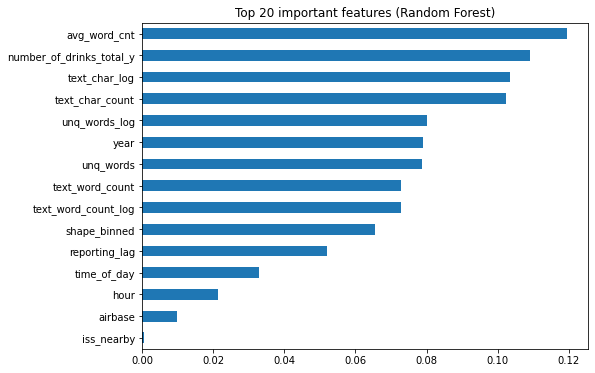

In [742]:
feat_importances = pd.Series(rnd_clf.feature_importances_, index=X_train.columns)

plt.figure(figsize=(8,6))
feat_importances.nlargest(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 important features (Random Forest)")
plt.show()

In [743]:
df_final.to_csv('final_features.csv',index=False)